# Requirements

In [1]:
import os, sys

pkg_path = 'D:\\Projects\\System_Trading\\JnQ_32bit\\'

os.chdir(pkg_path)

pakage_name = 'Bank'

# mpl_finance_path = 'D:\\python\\python38_1\\projects\\JnQ\\mpl_finance'
# ta_lib_path = 'D:\\python\\python38_1\\projects\\JnQ\\ta_lib'
funcs_path = pkg_path + 'funcs'

if funcs_path not in sys.path:

  try:
    # sys.path.insert(0, '/content/drive/My Drive/Colab Notebooks/JnQ')
    sys.path.insert(0, pkg_path + '\\{}'.format(pakage_name))
    sys.path.insert(0, funcs_path)
    # sys.path.insert(0, mpl_finance_path)
    # sys.path.insert(0, ta_lib_path)
    
  except Exception as e:
    print(e)


In [2]:
from funcs.kiwoom.pykiwoom import *
from funcs.kiwoom.kiwoom_module import KiwoomModule
from funcs.kiwoom.bank_module import BankModule
from funcs.public.constant import *

today = datetime.now()
todaystamp = today.year * 10000 + today.month * 100 + today.day 

np.seterr(invalid="ignore")
np.set_printoptions(suppress=True)
np.set_printoptions(linewidth=2000) 

pd.set_option('mode.chained_assignment',  None)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
from PyQt5.QtCore import *
from PyQt5.QtWidgets import *


class MyMainGUI(QDialog):
    def __init__(self, parent=None):
        super().__init__(parent)

        self.qtxt1 = QTextEdit(self)
        self.btn1 = QPushButton("Start", self)
        self.btn2 = QPushButton("Stop", self)
        self.btn3 = QPushButton("add 100", self)
        self.btn4 = QPushButton("send instance", self)

        vbox = QVBoxLayout()
        vbox.addWidget(self.qtxt1)
        vbox.addWidget(self.btn1)
        vbox.addWidget(self.btn2)
        vbox.addWidget(self.btn3)
        vbox.addWidget(self.btn4)
        self.setLayout(vbox)

        self.setGeometry(100, 50, 300, 300)

class Test:
    def __init__(self):
        name = ""


class MyMain(MyMainGUI):
    add_sec_signal = pyqtSignal()
    send_instance_singal = pyqtSignal("PyQt_PyObject")

    def __init__(self, parent=None):
        super().__init__(parent)

        self.btn1.clicked.connect(self.time_start)
        self.btn2.clicked.connect(self.time_stop)
        self.btn3.clicked.connect(self.add_sec)
        self.btn4.clicked.connect(self.send_instance)

        self.th = Worker(parent=self)
        self.th.sec_changed.connect(self.time_update)  # custom signal from worker thread to main thread

        self.add_sec_signal.connect(self.th.add_sec)   # custom signal from main thread to worker thread
        self.send_instance_singal.connect(self.th.recive_instance_singal)
        self.show()

    @pyqtSlot()
    def time_start(self):
        self.th.start()
        self.th.working = True

    @pyqtSlot()
    def time_stop(self):
        self.th.working = False

    @pyqtSlot()
    def add_sec(self):
        print(".... add singal emit....")
        self.add_sec_signal.emit()

    @pyqtSlot(str)
    def time_update(self, msg):
        self.qtxt1.append(msg)

    @pyqtSlot()
    def send_instance(self):
        t1 = Test()
        t1.name = "SuperPower!!!"
        self.send_instance_singal.emit(t1)


class Worker(QThread):
    sec_changed = pyqtSignal(str)

    def __init__(self, sec=0, parent=None):
        super().__init__()
        self.main = parent
        self.working = True
        self.sec = sec

        # self.main.add_sec_signal.connect(self.add_sec)   # 이것도 작동함. # custom signal from main thread to worker thread

    def __del__(self):
        print(".... end thread.....")
        self.wait()

    def run(self):
        bank.get_order_info(계좌번호=bank.account_number, 전체종목구분=0, 매매구분="0", 종목코드="", 체결구분="1")
        # while self.working:
        #     self.sec_changed.emit('time (secs)：{}'.format(self.sec))
        #     self.sleep(1)
        #     self.sec += 1

    @pyqtSlot()
    def add_sec(self):
        print("add_sec....")
        self.sec += 100

    @pyqtSlot("PyQt_PyObject")
    def recive_instance_singal(self, inst):
        print(inst.name)



if __name__ == "__main__":
    import sys

    app = QApplication(sys.argv)
    form = MyMain()
    app.exec_()

In [6]:
from threading import Thread, Event
from threading import Lock
from time import sleep
from time import time

event = Event()
data_lock = Lock()

class BankTest:
    
    def __init__(self):
        self.var = [1, 2, 3]
        
    def print_vars(self):
        print("self.var :", self.var)

    def modify_variable(self):
        while True:
            for i in range(len(self.var)):
                # with data_lock:
                 self.var[i] += 1
            print("modify_variable")
            self.print_vars()
            # print("num : ")
            if event.is_set():
                break
            sleep(.5)
        print('Stop printing')
        
    def modify_variable2(self):
        while True:
            for i in range(len(self.var)):
                # with data_lock:
                 self.var[i] += 1
            print("modify_variable2")
            self.print_vars()
            # print("num : ")
            if event.is_set():
                break
            sleep(.5)
        print('Stop printing')

# def modify_variable(var, num):
#     while True:
#         for i in range(len(var)):
#             var[i] += 1        
#         print("num : ", num)
#         if event.is_set():
#             break
#         sleep(.5)
#     print('Stop printing')

    def run(self):
        
        t = Thread(target=self.modify_variable, args=())
        t2 = Thread(target=self.modify_variable2, args=())
        t.start()
        t2.start()
        
        t.join()
        t2.join()
        

In [5]:
def get_order_info_wrapper():
    print(bank.get_order_info(계좌번호=bank.account_number, 전체종목구분=0, 매매구분="0", 종목코드="", 체결구분="1"))

get_order_info_wrapper()

 message :  조회가 완료되었습니다.
on_receive_tr_data 실행: screen_no: 2000, request_name: 미체결요청, tr_code: opt10075, record_name: , inquiry: 0
self.order_no : 


return_code : 0
     종목코드 종목명 주문구분 주문상태 주문수량 미체결수량 체결가 체결량 현재가
주문번호                                          
                                              


In [ ]:
t = Thread(target=get_order_info_wrapper)
t.start()
t.join()

In [3]:
def bank_proc():    
    bank_test = BankTest()
    bank_test.run()    
    
# def bank_proc():
#     while 1:
#         print(1)
#         sleep(0.5)

In [ ]:
bank_proc()

In [ ]:
# Import Module
import sys
from PyQt5.QtWidgets import *
import time
from threading import *

class ListBox(QWidget):

	def __init__(self):
		super().__init__()

		self.Button()

	def Button(self):
		# Add Push Button
# 		clear_btn = QPushButton('Click Me', self)
# 		clear_btn.clicked.connect(self.thread)

# 		# Set geometry
# 		self.setGeometry(200, 200, 200, 200)

# 		# Display QlistWidget
# 		self.show()
            self.thread()
            time.sleep(2)
            self.thread()

	def thread(self):
		t1=Thread(target=self.Operation)
		t1.start()

	def Operation(self):        
            start_time = time.time()
            while 1:            
                elapsed_time = time.time() - start_time
                print(elapsed_time)
                time.sleep(1)
                if elapsed_time > 3:
                    quit
            

if __name__ == '__main__':
	app = QApplication(sys.argv)
	
	# Call ListBox Class
	ex = ListBox()

	# Close the window
	sys.exit(app.exec_())


In [26]:
from multiprocessing import Process

process = Process(target=bank_proc, args=())
process.start()
process.join()

In [7]:
from threading import Thread, Event
from threading import Lock
from time import sleep
from time import time

event = Event()
data_lock = Lock()

def modify_variable(var, num):
    while True:
        for i in range(len(var)):
            with data_lock:
                var[i] += 1
        print("num : ", num)
        if event.is_set():
            break
        sleep(.5)
    print('Stop printing')

# def modify_variable(var, num):
#     while True:
#         for i in range(len(var)):
#             var[i] += 1        
#         print("num : ", num)
#         if event.is_set():
#             break
#         sleep(.5)
#     print('Stop printing')


my_var = [1, 2, 3]
t = Thread(target=modify_variable, args=(my_var, 1, ))
t2 = Thread(target=modify_variable, args=(my_var, 2, ))
t.start()
t2.start()
t0 = time()
while time()-t0 < 5:
    try:
        print(my_var)
        sleep(1)
    except KeyboardInterrupt:
        event.set()
        break
event.set()
# quit()
t.join()
t2.join()
print(my_var)

num :  1
num :  2
[3, 4, 5]
num : num :  1
 2
[5, 6, 7]
num :  1
num :  2
num : num :  2
 1
[9, 10, 11]
num :  1
num :  2
num : num :  2
 1
[13, 14, 15]
num :  1
num :  2
num : num :  1
 2
[17, 18, 19]
num :  1
num :  2
num :  1
num :  2
num : num :  2
Stop printing
 1
Stop printing
[23, 24, 25]


# Methods

## Class

### KiwoomModule

In [7]:
from funcs.kiwoom.pykiwoom import Kiwoom
import pandas as pd
import math
import time


class KiwoomModule2(Kiwoom):
    def __init__(self, secret_key):

        super().__init__()

        self.comm_connect()

        if self.get_connect_state():
            print("connected.")
        else:
            print("disconnected.")

        self.screen_number = "2000"  # 추후 module_phase 에 따라 다변화할 것. (Todo)
        self.account_number = self.get_login_info("ACCNO").split(";")[0]
        self.password = secret_key

        self.data_opt10004 = None  # 주식호가요청
        self.data_opt10027 = None  # 전일대비등락상위요청
        self.data_opt10075 = None  # 미체결요청
        self.data_opt10080 = None  # 분봉차트요청
        self.realtime_price = None  # 체결정보요청
        
        self.realtime_data = None  # declared for receive_real_data
        self.OnReceiveRealData.connect(self._handler_real_data)
        
    def _handler_real_data(self, code, real_type, real_data):
        print(code, real_type, real_data)
        if real_type == "장시작시간":
            gubun =  self.get_comm_real_data(code, 215)
            remained_time =  self.get_comm_real_data(code, 214)
            print(gubun, remained_time)       
        
    def receive_real_data(self, code, real_type, real_data):
        """
        실시간 데이터 수신 이벤트

        실시간 데이터를 수신할 때 마다 호출되며,
        set_real_reg() 메서드로 등록한 실시간 데이터도 이 이벤트 메서드에 전달됩니다.
        get_comm_real_data() 메서드를 이용해서 실시간 데이터를 얻을 수 있습니다.

        :param code: string - 종목코드
        :param real_type: string - 실시간 타입(KOA의 실시간 목록 참조)
        :param real_data: string - 실시간 데이터 전문
        """

        try:
            self.log.debug("[receiveRealData]")
            self.log.debug("({})".format(real_type))

            if real_type not in RealType.REALTYPE:
                return

            data = []

            if code != "":
                data.append(code)
                codeOrNot = code
            else:
                codeOrNot = real_type

            for fid in sorted(RealType.REALTYPE[real_type].keys()):
                value = self.get_comm_real_data(codeOrNot, fid)
                data.append(value)
                self.realtime_data = value

            # TODO: DB에 저장
            self.log.debug(data)

        except Exception as e:
            self.log.error('{}'.format(e))

    def concat_candlestick(self, days, api_term=0.3, **kwargs):

        """
        현재, 모든 거래소로부터 얻는 ohlcv dataframe 의 interval 기준은 T (1m) 으로 설정함.
            1. T 를 기준으로 to_htf() 를 사용해 custom htf data 를 이용하도록함.

        종목코드 = 전문 조회할 종목코드
        틱범위 = 1:1분, 3:3분, 5:5분, 10:10분, 15:15분, 30:30분, 45:45분, 60:60분
        수정주가구분 = 0 or 1, 수신데이터 1:유상증자, 2:무상증자, 4:배당락, 8:액면분할, 16:액면병합, 32:기업합병, 64:감자, 256:권리락
        """

        for key, value in kwargs.items():
            self.set_input_value(key, value)
        self.comm_rq_data("주식분봉차트조회요청", "opt10080", 0, self.screen_number)

        ohlcv = self.data_opt10080

        # concat
        for _ in range(days - 1):
            time.sleep(api_term)
            for key, value in kwargs.items():
                self.set_input_value(key, value)
            self.comm_rq_data("주식분봉차트조회요청", "opt10080", 2, self.screen_number)
            ohlcv = pd.concat([ohlcv, self.data_opt10080])

        # 1. col_name 변경
        ohlcv.columns = ['index', 'open', 'high', 'low', 'close', 'volume']

        # 2. index 수정 및 data type float 사용 : ta-lib 연산을 위해서. (주문시에는 calc_with_hoga_unit 적용하기 때문에 무관함.)
        ohlcv = ohlcv.set_index('index').astype(float).abs()

        # 3. 시계열 순서로 데이터 정렬 및 index datetime type 으로 변환.
        if ohlcv.index.dtype != str:
            timeindex = pd.to_datetime(ohlcv.index.astype(str))
            ohlcv.index = timeindex
            ohlcv = ohlcv.sort_index()

        return ohlcv[~ohlcv.index.duplicated(keep='last')]  # 중복 제거.

    def get_high_fluc_than_day_before(self, **kwargs):

        """
        시장구분 = 000:전체, 001:코스피, 101:코스닥
        정렬구분 = 1:상승률, 2:상승폭, 3:하락률, 4:하락폭, 5:보합
        거래량조건 = 0000:전체조회, 0010:만주이상, 0050:5만주이상, 0100:10만주이상, 0150:15만주이상, 0200:20만주이상, 0300:30만주이상, 0500:50만주이상, 1000:백만주이상
        종목조건 = 0:전체조회, 1:관리종목제외, 4:우선주+관리주제외, 3:우선주제외, 5:증100제외, 6:증100만보기, 7:증40만보기, 8:증30만보기, 9:증20만보기, 11:정리매매종목제외, 12:증50만 보기, 13:증60만 보기, 14:ETF제외, 15:스팩제외, 16:ETF+ETN제외
        신용조건 = 0:전체조회, 1:신용융자A군, 2:신용융자B군, 3:신용융자C군, 4:신용융자D군, 5:신용한도초과제외, 8:신용대주, 9:신용융자전체
        상하한포함 = 0:불 포함, 1:포함
        가격조건 = 0:전체조회, 1:1천원미만, 2:1천원~2천원, 3:2천원~5천원, 4:5천원~1만원, 5:1만원이상, 8:1천원이상, 10:1만원미만
        거래대금조건 = 0:전체조회, 3:3천만원이상, 5:5천만원이상, 10:1억원이상, 30:3억원이상, 50:5억원이상, 100:10억원이상, 300:30억원이상, 500:50억원이상, 1000:100억원이상, 3000:300억원이상, 5000:500억원이상
        """

        for key, value in kwargs.items():
            self.set_input_value(key, value)
        self.comm_rq_data("전일대비등락률상위요청", "opt10027", 0, self.screen_number)

        return self.data_opt10027

    def get_account_info(self, **kwargs):
        
        for key, value in kwargs.items():
            self.set_input_value(key, value)
            # if value == "비밀번호":  # 비밀번호까지만 동일하게 입력
            #     break
        self.comm_rq_data("계좌평가잔고내역요청", "opw00018", 0, self.screen_number)
        while self.inquiry == '2':
            for key, value in kwargs.items():
                self.set_input_value(key, value)
                # if value == "비밀번호":  # 비밀번호까지만 동일하게 입력
                #     break
            self.comm_rq_data("계좌평가잔고내역요청", "opw00018", 0, self.screen_number)
        
        int_cols = ["총매입금액", "총평가금액", "총평가손익금액", "총수익률(%)", "추정예탁자산"]
        for col in int_cols:
            self.data_opw00018["account_evaluation"][col] = self.data_opw00018["account_evaluation"][col].astype(int)
            if col == "총수익률(%)":
                self.data_opw00018["account_evaluation"][col] /= 100
        
        # stocks data 의 경우 종목명을 index 로 변경함 => tr_data 에 key 값으로 접근하기 편해짐
        self.data_opw00018["stocks"] = self.data_opw00018["stocks"].set_index("종목명")
        int_cols = ["보유수량", "매매가능수량", "매입가", "현재가", "평가손익", "수익률(%)"]
        for col in int_cols:
            self.data_opw00018["stocks"][col] = self.data_opw00018["stocks"][col].astype(int)
            if col == "수익률(%)":
                self.data_opw00018["stocks"][col] /= 100
        
        return self.data_opw00018["stocks"]
        
        
    def get_available_balance(self, **kwargs):

        """
        지금은 여러개의 결과값을 출력하지만, 추후에 단일 데이터 출력할 것으로 예상함.

        계좌번호 = 전문 조회할 보유계좌번호
        비밀번호 = 사용안함(공백)
        비밀번호입력매체구분 = 00
        조회구분 = 1:합산, 2:개별
        """

        for key, value in kwargs.items():
            self.set_input_value(key, value)
        self.comm_rq_data("예수금상세현황요청", "opw00001", 0, self.screen_number)

        # int_cols = ["예수금", "주문가능금액", "100%종목주문가능금액", "d+1추정예수금", "d+2추정예수금"]
        # for col in int_cols:
        #     self.data_opw00001[col] = self.data_opw00001[col].astype(int)        

        return self.data_opw00001  # , self.data_opw00018

    def get_order_info(self, **kwargs):

        """
        by 미체결요청
            계좌번호 = 전문 조회할 보유계좌번호
            전체종목구분 = 0:전체, 1:종목
            매매구분 = 0:전체, 1:매도, 2:매수
            종목코드 = 전문 조회할 종목코드 (공백허용, 공백입력시 전체종목구분 "0" 입력하여 전체 종목 대상으로 조회)
            체결구분 = 0:전체, 2:체결, 1:미체결
        """

        for key, value in kwargs.items():
            self.set_input_value(key, value)
        self.comm_rq_data("미체결요청", "opt10075", 0, self.screen_number)

        self.data_opt10075 = self.data_opt10075.set_index("주문번호")
        if len(self.data_opt10075) > 1:  # data validation
            int_cols = ["주문수량", "미체결수량", "체결가", "체결량", "현재가"]
            for col in int_cols:
                self.data_opt10075[col] = self.data_opt10075[col].astype(int).abs()

        return self.data_opt10075

    def get_market_price(self, **kwargs):

        for key, value in kwargs.items():
            self.set_input_value(key, value)
        self.comm_rq_data("체결정보요청", "opt10003", 0, self.screen_number)

        return self.realtime_price

    def get_precision_by_price(self, **kwargs):

        for key, value in kwargs.items():
            self.set_input_value(key, value)
        self.comm_rq_data("주식호가요청", "opt10004", 0, self.screen_number)

        # self.data_opt10004 = self.data_opt10004.astype(int)
        # return abs(self.data_opt10004["매수최우선호가"] - self.data_opt10004["매수2차선호가"])[0]
        return self.data_opt10004

    def calc_with_hoga_unit(self, price):  # Stock 에서는 price_precision 이 무효함.

        """
        1. 체결을 고려해 올림을 기본으로 함 (+ 1 을 한 이유.)
        2. integer
        """

        hoga_unit = self.get_hoga_unit(price)

        return int(((price // hoga_unit) + 1) * hoga_unit)

    def tr_data_to_dataframe(self, tr_code, request_name, rows, outputs):

        data_list = []
        for row in range(rows):
            row_data = []
            for output in outputs:
                data = self.comm_get_data(tr_code, "", request_name, row, output)
                row_data.append(data)
            data_list.append(row_data)

        return pd.DataFrame(data=data_list, columns=outputs)
    
    def receive_msg(self, screen_no, request_name, tr_code, msg):
        """
        수신 메시지 이벤트

        서버로 어떤 요청을 했을 때(로그인, 주문, 조회 등), 그 요청에 대한 처리내용을 전달해준다.

        :param screen_no: string - 화면번호(4자리, 사용자 정의, 서버에 조회나 주문을 요청할 때 이 요청을 구별하기 위한 키값)
        :param request_name: string - TR 요청명(사용자 정의)
        :param tr_code: string
        :param msg: string - 서버로 부터의 메시지
        """

        if request_name == "서버구분":

            if msg.find('모의투자') < 0:
                # 1. 실서버
                self.server_gubun = 1

            else:
                # 2. 모의서버
                self.server_gubun = 0

            try:
                self.order_loop.exit()
            except AttributeError:
                pass
            finally:
                return

        # self.msg += request_name + ": " + msg + "\r\n\r\n"
        print("{} message : {}".format(request_name, msg))
        self.msg = ""


    def on_receive_tr_data(self, screen_no, request_name, tr_code, record_name, inquiry, unused0, unused1, unused2,
                           unused3):
        """
        TR 수신 이벤트
        조회요청 응답을 받거나 조회데이터를 수신했을 때 호출됩니다.
        request_name tr_code comm_rq_data()메소드의 매개변수와 매핑되는 값 입니다.
        조회데이터는 이 이벤트 메서드 내부에서 comm_get_data() 메서드를 이용해서 얻을 수 있습니다.
        :param screen_no: string - 화면번호(4자리)
        :param request_name: string - TR 요청명(comm_rq_data() 메소드 호출시 사용된 requestName)
        :param tr_code: string
        :param record_name: string
        :param inquiry: string - 조회('0': 남은 데이터 없음, '2': 남은 데이터 있음)
        """

        print("on_receive_tr_data 실행: screen_no: %s, request_name: %s, tr_code: %s, record_name: %s, inquiry: %s" % (
            screen_no, request_name, tr_code, record_name, inquiry))

        # 주문번호와 주문루프
        self.order_no = self.comm_get_data(tr_code, "", request_name, 0, "주문번호")

        try:
            self.order_loop.exit()
        except AttributeError:
            pass

        self.inquiry = inquiry

        rows = self.get_repeat_cnt(tr_code, request_name)
        if rows == 0:
            rows = 1

        if request_name == "주식분봉차트조회요청":
            outputs = ["체결시간", "시가", "고가", "저가", "현재가", "거래량"]
            self.data_opt10080 = self.tr_data_to_dataframe(tr_code, request_name, rows, outputs)

        if request_name == "전일대비등락률상위요청":
            outputs = ['종목분류', '종목코드', '종목명', '현재가', '전일대비기호', '전일대비', '등락률']
            self.data_opt10027 = self.tr_data_to_dataframe(tr_code, request_name, rows, outputs)

        if request_name == "예수금상세현황요청":
            # outputs = ["예수금", "주문가능금액", "100%종목주문가능금액", "d+1추정예수금", "d+2추정예수금"]
            # self.data_opw00001 = self.tr_data_to_dataframe(tr_code, request_name, rows, outputs)

            self.data_opw00001 = int(self.comm_get_data(tr_code, "", request_name, 0, "d+2추정예수금"))

        if request_name == '계좌평가잔고내역요청':
            # # init data_opw00018
            # self.data_opw00018 = {'account_evaluation': [], 'stocks': []}

            # 계좌 평가 정보
            #     1. 한 request phase 에서 여러 요청을 수렴하는 경우 rows 사용 주의.
            outputs = ["총매입금액", "총평가금액", "총평가손익금액", "총수익률(%)", "추정예탁자산"]
            self.data_opw00018['account_evaluation'] = self.tr_data_to_dataframe(tr_code, request_name, 1, outputs)

            # 보유 종목 정보
            outputs = ["종목번호", "종목명", "보유수량", "매매가능수량", "매입가", "현재가", "평가손익", "수익률(%)"]
            self.data_opw00018['stocks'] = self.tr_data_to_dataframe(tr_code, request_name, rows, outputs)

        if request_name == "체결정보요청":
            # 특정 주문 번호가 정의되지 않은 상태에서, 종목에 대한 현재가 조회
            self.realtime_price = self.comm_get_data(tr_code, "", request_name, 0, "현재가")

        if request_name == "주식호가요청":
            # outputs = ["매수최우선호가", "매수2차선호가", "매수최우선잔량"]
            # self.data_opt10004 = self.tr_data_to_dataframe(tr_code, request_name, rows, outputs)
            price_1st = self.comm_get_data(tr_code, "", request_name, 0, "매수최우선호가")
            price_2nd = self.comm_get_data(tr_code, "", request_name, 0, "매수2차선호가")
            self.data_opt10004 = abs(int(price_1st) - int(price_2nd))

        if request_name == "미체결요청":
            # 1. 미체결요청 tr_code 로 체결에 관한 데이터도 충분히 조회가 가능함
            #     a. 특정 주문번호에 대한 데이터 조회시, 종목 조회 후 주문번호 키매칭.
            # 2. 현재가는 hl_out 을 위해서 사용할 것
            outputs = ["종목코드", "종목명", "주문번호", "주문상태", "주문수량", "미체결수량", "체결가", "체결량", "현재가"]
            self.data_opt10075 = self.tr_data_to_dataframe(tr_code, request_name, rows, outputs)

        try:
            self.request_loop.exit()
        except AttributeError:
            pass

    @staticmethod
    def get_hoga_unit(price):

        if price < 2000:
            return 1
        elif price < 5000:
            return 5
        elif price < 20000:
            return 10
        elif price < 50000:
            return 50
        elif price < 200000:
            return 100
        elif price < 500000:
            return 500
        else:
            return 1000

    @staticmethod
    def calc_with_precision(data, data_precision, def_type='floor'):

        """
        1. quantity 는 Stock 특성상 '0' precision 사용함.
        """

        if not pd.isna(data):
            if data_precision > 0:
                if def_type == 'floor':
                    data = math.floor(data * (10 ** data_precision)) / (10 ** data_precision)
                elif def_type == 'round':
                    data = float(round(data, data_precision))
                else:
                    data = math.ceil(data * (10 ** data_precision)) / (10 ** data_precision)
            else:
                data = int(data)

        return data


### BankModule

In [8]:
from funcs.kiwoom.kiwoom_module import KiwoomModule
from funcs.public.broker import calc_rows_and_days
from funcs.public.constant import *

import numpy as np
import pandas as pd
from datetime import datetime
import time
from ast import literal_eval
import pickle
import logging.config


class BankModule2(KiwoomModule2):

    def __init__(self, config):

        secret_key = self.load_key(r"D:\Projects\System_Trading\JnQ_32bit\Bank\api_keys\kiwoom_5189140110.pkl")
        super().__init__(secret_key)

        # 0. config, sys_log 는 BankModule 에서만 사용됨.
        self.config = config
        self.sys_log = logging.getLogger()

    @staticmethod
    def load_key(key_abspath):
        with open(key_abspath, 'rb') as f:
            return pickle.load(f)

    def get_new_df(self, code, api_term=0.3, calc_rows=True, mode="OPEN"):

        """
        1. remove use_rows : 사용하지 않아서.
        """

        while 1:
            try:
                row_list = literal_eval(self.config.trader_set.row_list)
                if calc_rows:
                    itv_list = literal_eval(self.config.trader_set.itv_list)
                    rec_row_list = literal_eval(self.config.trader_set.rec_row_list)
                    _, days = calc_rows_and_days(itv_list, row_list, rec_row_list)
                else:
                    _, days = row_list[0], 1  # load_new_df3 사용 의도 = close, time logging
                new_df_, _ = self.concat_candlestick(days, api_term, 종목코드=code, 틱범위="1", 수정주가구분="0")

                # new_df_ validity check (Stock 의 경우 59.999 초를 더해주어야함, timeindex 의 second = 0)
                #    1. datetime timestamp() 의 기준은 second 임.
                if datetime.timestamp(new_df_.index[-1]) + 59.999 < datetime.now().timestamp():
                    time.sleep(self.config.trader_set.realtime_term)
                    continue
                if mode == "OPEN":
                    self.sys_log.info("complete new_df_'s time : {}".format(datetime.now()))

            except Exception as e:
                self.sys_log.error("error in get_new_df : {}".format(e))
                #        1. adequate term for retries
                time.sleep(self.config.trader_set.api_term)
                continue
            else:
                return new_df_, 0  # 0 for load_new_df var.

    def get_streamer(self, code):

        """
        back_data_path 에 code 로 입력할 것
        """

        row_list = literal_eval(self.config.trader_set.row_list)
        itv_list = literal_eval(self.config.trader_set.itv_list)
        rec_row_list = literal_eval(self.config.trader_set.rec_row_list)
        use_rows, days = calc_rows_and_days(itv_list, row_list, rec_row_list)

        # back_df = pd.read_pickle(self.config.trader_set.back_data_path.replace("code", code))
        back_df = pd.read_pickle(self.config.trader_set.back_data_path.replace("code", code)).astype(float)  # int 로 저장해서, 임시적으로 변경함.

        if self.config.trader_set.start_datetime != "None":
            target_datetime = pd.to_datetime(self.config.trader_set.start_datetime)
            if target_datetime in back_df.index:
                start_idx = np.argwhere(back_df.index == target_datetime).item()
            else:
                start_idx = use_rows
        else:
            start_idx = use_rows

        # 시작하는 idx 는 필요로하는 rows 보다 커야함.
        assert start_idx >= use_rows, "more dataframe rows required"

        for i in range(start_idx + 1, len(back_df)):  # +1 for i inclusion
            yield back_df.iloc[i - use_rows:i]

    def get_new_df_onstream(self, streamer):
        try:
            res_df = next(streamer)  # Todo, 무결성 검증 미진행
        except Exception as e:
            self.sys_log.error("error in get_new_df_onstream : {}".format(e))
            quit()  # error 처리할 필요없이, backtrader 프로그램 종료
            # return None, None   # output len 유지
        else:
            return res_df, 0

    def get_open_side_v2(self, res_df, papers, np_timeidx, open_num=1):

        public, utils_list, config_list = papers
        utils, config = None, config_list[0]    # 첫 config 로 초기화.
        open_side = None

        for utils_, cfg_ in zip(utils_list, config_list):

            # ------ 1. point ------ #
            #  여기 왜 latest_index 사용했는지 모르겠음 -> bar_close point 를 고려해 mr_res 와의 index 분리
            #   vecto. 하는 이상, point x ep_loc 의 index 는 sync. 되어야함 => complete_index 사용 (solved)
            #  Todo, 각 phase 분리한 이유 = sys_logging (solved)
            if res_df['short_open{}_{}'.format(open_num, cfg_.selection_id)].to_numpy()[cfg_.trader_set.complete_index]:
                self.sys_log.warning("[ short ] true_point selection_id : {}".format(cfg_.selection_id))

                # ------ 2. ban ------ #
                if not cfg_.pos_set.short_ban:

                    # ------ 3. mr_res ------ #
                    if open_num == 1:
                        mr_res, zone_arr = public.ep_loc_p1_v3(res_df, cfg_, np_timeidx, show_detail=True, ep_loc_side=OrderSide.SELL)
                    else:
                        mr_res, zone_arr = public.ep_loc_p2_v3(res_df, cfg_, np_timeidx, show_detail=True, ep_loc_side=OrderSide.SELL)
                    self.sys_log.warning("mr_res[cfg_.trader_set.complete_index] : {}".format(mr_res[cfg_.trader_set.complete_index]))

                    # ------ assign ------ #
                    if mr_res[cfg_.trader_set.complete_index]:
                        utils = utils_
                        config = cfg_
                        open_side = OrderSide.SELL
                        break
                else:
                    self.sys_log.warning("cfg_.pos_set.short_ban : {}".format(cfg_.pos_set.short_ban))

            # ------ 1. point ------ #
            #       'if' for nested ep_loc.point        #
            if res_df['long_open{}_{}'.format(open_num, cfg_.selection_id)].to_numpy()[cfg_.trader_set.complete_index]:
                self.sys_log.warning("[ long ] true_point selection_id : {}".format(cfg_.selection_id))

                # ------ 2. ban ------ #
                if not cfg_.pos_set.long_ban:  # additional const. on trader

                    # ------ 3. mr_res ------ #
                    if open_num == 1:
                        mr_res, zone_arr = public.ep_loc_p1_v3(res_df, cfg_, np_timeidx, show_detail=True, ep_loc_side=OrderSide.BUY)
                    else:
                        mr_res, zone_arr = public.ep_loc_p2_v3(res_df, cfg_, np_timeidx, show_detail=True, ep_loc_side=OrderSide.BUY)
                    self.sys_log.warning("mr_res[cfg_.trader_set.complete_index] : {}".format(mr_res[cfg_.trader_set.complete_index]))

                    # ------ assign ------ #
                    if mr_res[cfg_.trader_set.complete_index]:
                        utils = utils_
                        config = cfg_
                        open_side = OrderSide.BUY
                        break
                else:
                    self.sys_log.warning("cfg_.pos_set.long_ban : {}".format(cfg_.pos_set.long_ban))

        return open_side, utils, config

    def get_tpepout(self, open_side, res_df_open, res_df, mode="ep1"):
        self.sys_log.info('open_side : {}'.format(open_side))
        selection_id = self.config.selection_id

        tp_j = self.config.trader_set.complete_index
        ep_j = self.config.trader_set.complete_index
        # Todo, complete_index + 1 이 아니라, 해당 index 롤 res_df_open 이 아닌 -> res_df 에 입력하면 되는거아닌가
        #  -> use_point2 여부에 따라 다르게 작성할 필요가 없어짐 (solved)
        out_j = self.config.trader_set.complete_index

        #       Todo        #
        #        b. --> res_df 사용시, dynamic (pre, whole) 을 허용하겠다는 의미
        #           i. ep_loc_point2 미사용시, res_df = res_df_open
        if open_side == OrderSide.BUY:
            ep = res_df_open['long_ep1_{}'.format(selection_id)].to_numpy()[ep_j]

            if self.config.pos_set.long_inversion:
                open_side = OrderSide.SELL  # side change (inversion)
                out = res_df['long_tp_{}'.format(selection_id)].to_numpy()[out_j]
                tp = res_df_open['long_out_{}'.format(selection_id)].to_numpy()[tp_j]
            else:
                out = res_df['long_out_{}'.format(selection_id)].to_numpy()[out_j]
                tp = res_df_open['long_tp_{}'.format(selection_id)].to_numpy()[tp_j]
        else:
            ep = res_df_open['short_ep1_{}'.format(selection_id)].to_numpy()[ep_j]

            if self.config.pos_set.short_inversion:
                open_side = OrderSide.BUY
                out = res_df['short_tp_{}'.format(selection_id)].to_numpy()[out_j]
                tp = res_df_open['short_out_{}'.format(selection_id)].to_numpy()[tp_j]
            else:
                out = res_df['short_out_{}'.format(selection_id)].to_numpy()[out_j]
                tp = res_df_open['short_tp_{}'.format(selection_id)].to_numpy()[tp_j]

        return tp, ep, out, open_side

    def check_open_exec_qty_v2(self, order_no):
        """
        1. breakout_gty_ratio
            a. exec_open_qty 와 open_quantity 의 ratio 비교
            b. realtime_term 에 delay 주지 않기 위해, term 설정
        2. 이걸 설정 안해주면 체결되도 close_order 진행 안됨
        """

        order_info = self.get_order_info(계좌번호=self.account_number, 전체종목구분=0, 매매구분="0", 종목코드="", 체결구분="0")
        order_info_valid = order_info.loc[order_no]
        open_exec = order_info_valid['체결량'] / order_info_valid['주문수량'] >= self.config.trader_set.open_exec_qty_ratio \
                    or order_info_valid['주문상태'] == "체결"
        return open_exec

    def check_ei_k_v2(self, res_df_open, res_df, realtime_price, open_side):

        """
        = expire_tp
            1. check_ei_k_onbarclose_v2 에서는 expire_tick 기준으로 res_df_open, res_df 둘다 사용함.
                a. 형태 유지를 위해 이곳에서도 res_df input 으로 유지함.
        """

        ep_out = 0
        selection_id = self.config.selection_id

        if self.config.tr_set.expire_tick != "None":
            if time.time() - datetime.timestamp(res_df_open.index[self.config.trader_set.latest_index]) \
                    >= self.config.tr_set.expire_tick * 60:
                ep_out = 1

        if self.config.tr_set.expire_k1 != "None":  # Todo -> 이거 None 이면 "무한 대기" 발생 가능함
            # realtime_price = self.get_market_price_v2()
            tp_j = self.config.trader_set.complete_index
            #       Todo        #
            #        2. 추후, dynamic_tp 사용시 res_df 갱신해야할 것
            #           a. 그에 따른 res_df 종속 변수 check
            #        3. ei_k - ep_out 변수 달아주고, close bar waiting 추가할지 고민중
            #        4. warning - 체결량 존재하는데, ep_out 가능함 - market 고민중
            #        5. funcs_trader_modules 에서 order_side check 하는 function 모두 inversion 고려해야할 것
            #           a. "단, order_side change 후로만 해당됨
            if open_side == OrderSide.SELL:
                short_tp_ = res_df_open['short_tp_{}'.format(selection_id)].to_numpy()  # id 에 따라 dynamic 변수라 이곳에서 numpy 화 진행
                short_tp_gap_ = res_df_open['short_tp_gap_{}'.format(selection_id)].to_numpy()
                if realtime_price <= short_tp_[tp_j] + short_tp_gap_[tp_j] * self.config.tr_set.expire_k1:
                    ep_out = 1
            else:
                long_tp_ = res_df_open['long_tp_{}'.format(selection_id)].to_numpy()  # iloc 이 빠를까, to_numpy() 가 빠를까  # 3.94 ms --> 5.34 ms (iloc)
                long_tp_gap_ = res_df_open['long_tp_gap_{}'.format(selection_id)].to_numpy()
                if realtime_price >= long_tp_[tp_j] - long_tp_gap_[tp_j] * self.config.tr_set.expire_k1:
                    ep_out = 1
            time.sleep(self.config.trader_set.realtime_term)  # <-- for realtime price function

        if ep_out:
            self.sys_log.warning("cancel open_order by ei_k\n")

        return ep_out

    def check_ei_k_onbarclose_v2(self, res_df_open, res_df, e_j, tp_j, open_side):  # for point2

        """
        = expire_tp
        """

        ep_out = 0
        selection_id = self.config.selection_id

        if self.config.tr_set.expire_tick != "None":
            if datetime.timestamp(res_df.index[-1]) - datetime.timestamp(res_df_open.index[self.config.trader_set.latest_index]) \
                    >= self.config.tr_set.expire_tick * 60:
                ep_out = 1

        if self.config.tr_set.expire_k1 != "None":  # Todo - onbarclose 에서는, res_df_open 으로 open_index 의 tp 정보를 사용
            if open_side == OrderSide.SELL:
                low = res_df['low'].to_numpy()
                short_tp_ = res_df_open['short_tp_{}'.format(selection_id)].to_numpy()  # id 에 따라 dynamic 변수라 이곳에서 numpy 화 진행
                short_tp_gap_ = res_df_open['short_tp_gap_{}'.format(selection_id)].to_numpy()
                if low[e_j] <= short_tp_[tp_j] + short_tp_gap_[tp_j] * self.config.tr_set.expire_k1:
                    ep_out = 1
            else:
                high = res_df['high'].to_numpy()
                long_tp_ = res_df_open['long_tp_{}'.format(selection_id)].to_numpy()  # iloc 이 빠를까, to_numpy() 가 빠를까  # 3.94 ms --> 5.34 ms (iloc)
                long_tp_gap_ = res_df_open['long_tp_gap_{}'.format(selection_id)].to_numpy()
                if high[e_j] >= long_tp_[tp_j] - long_tp_gap_[tp_j] * self.config.tr_set.expire_k1:
                    ep_out = 1

        if ep_out:
            self.sys_log.warning("cancel open_order by ei_k\n")

        return ep_out

    def get_dynamic_tpout(self, res_df, open_side, tp, out):
        # ------ dynamic & inversion tp_out ------ #
        selection_id = self.config.selection_id
        if open_side == OrderSide.BUY:
            if self.config.pos_set.short_inversion:
                out_series = res_df['short_tp_{}'.format(selection_id)]
                tp_series = res_df['short_out_{}'.format(selection_id)]
            else:
                out_series = res_df['long_out_{}'.format(selection_id)]
                tp_series = res_df['long_tp_{}'.format(selection_id)]
        else:
            if self.config.pos_set.long_inversion:
                out_series = res_df['long_tp_{}'.format(selection_id)]
                tp_series = res_df['long_out_{}'.format(selection_id)]
            else:
                out_series = res_df['short_out_{}'.format(selection_id)]
                tp_series = res_df['short_tp_{}'.format(selection_id)]

        if not self.config.tp_set.static_tp:
            tp = tp_series.to_numpy()[self.config.trader_set.complete_index]
        if not self.config.out_set.static_out:
            out = out_series.to_numpy()[self.config.trader_set.complete_index]

        return tp, out, tp_series, out_series

    def get_partial_tp_qty(self, ep, tp, open_exec_qty, quantity_precision, close_side):

        """
        changed to calc_with_precision -> calc_with_hoga_unit for price, in Stock
        """
        partial_ranges, partial_qty_ratio = literal_eval(self.config.tp_set.partial_ranges), literal_eval(self.config.tp_set.partial_qty_ratio)
        partial_length = len(partial_ranges)
        assert partial_length == len(partial_qty_ratio)
        en_ps, tps, open_qtys = [np.tile(arr_, (partial_length,)) for arr_ in [ep, tp, open_exec_qty]]

        if close_side == OrderSide.BUY:  # short
            partial_tps = en_ps - (en_ps - tps) * partial_ranges
        else:  # long
            partial_tps = en_ps + (tps - en_ps) * partial_ranges
        partial_qtys = open_qtys * partial_qty_ratio

        partial_tps = list(map(lambda x: self.calc_with_hoga_unit(x), partial_tps))
        partial_qtys = list(map(lambda x: self.calc_with_precision(x, quantity_precision), partial_qtys))
        self.sys_log.info('partial_tps : {}'.format(partial_tps))
        self.sys_log.info('partial_qtys : {}'.format(partial_qtys))

        return partial_tps, partial_qtys

    def check_limit_tp_exec_v2(self, order_no_list, quantity_precision=0):

        all_executed = 0
        order_info = self.get_order_info(계좌번호=self.account_number, 전체종목구분=0, 매매구분="0", 종목코드="", 체결구분="0")

        #     1. order_no_list 의 "" (공백) 에 대한 무결성 검증해야함. (loc 접근할때 안되니까)
        #         a. 입력되는 order_no_list 에 공백만 존재할 수는 없다고 어느정도 가정한 상황임.
        order_no_arr = np.array(order_no_list)
        order_no_arr = order_no_arr[np.where(order_no_arr != "")[0]]

        order_info_valid = order_info.loc[order_no_arr]
        order_exec_check = order_info_valid["주문수량"] - order_info_valid["체결량"] < 1 / (10 ** quantity_precision)

        # 손매매로 인한 order_info.status == EXPIRED 는 고려 대상이 아님. (손매매 이왕이면 하지 말라는 이야기)
        if np.sum(order_exec_check) == len(order_exec_check):
            self.sys_log.info('all limit tp order executed')
            all_executed = 1

        exec_price_list = [exec_price for exec_price, executed in zip(order_info_valid["체결가"], order_exec_check) if executed]
        return all_executed, exec_price_list

    def check_hl_out_onbarclose_v2(self, res_df, market_close_on, out, liqd_p, open_side):

        """
        v1 -> v2
            1. add liquidation platform.
            2. add log_out
        """

        log_out = None
        c_i = self.config.trader_set.complete_index

        high = res_df['high'].to_numpy()[c_i]
        low = res_df['low'].to_numpy()[c_i]
        close = res_df['close'].to_numpy()[c_i]

        # ------ 1. liquidation default check ------ #
        if open_side == OrderSide.SELL:
            const_str = "high >= liqd_p"
            if eval(const_str):
                market_close_on = True
                log_out = liqd_p
                self.sys_log.info("{} : {} {}".format(const_str, high, liqd_p))
        else:
            const_str = "low <= liqd_p"
            if eval(const_str):
                market_close_on = True
                log_out = liqd_p
                self.sys_log.info("{} : {} {}".format(const_str, low, liqd_p))

        # ------ 2. hl_out ------ #
        if self.config.out_set.hl_out:
            if open_side == OrderSide.SELL:
                const_str = "high >= out"
                if eval(const_str):
                    market_close_on = True
                    log_out = out
                    self.sys_log.info("{} : {} {}".format(const_str, high, out))
            else:
                const_str = "low <= out"
                if eval(const_str):
                    market_close_on = True
                    log_out = out
                    self.sys_log.info("{} : {} {}".format(const_str, low, out))

        # ------ 3. close_out ------ #
        else:
            if open_side == OrderSide.SELL:
                if close >= out:
                    market_close_on = True
                    log_out = close
                    self.sys_log.info("{} : {} {}".format("close >= out", log_out, out))
            else:
                if close <= out:
                    market_close_on = True
                    log_out = close
                    self.sys_log.info("{} : {} {}".format("close <= out", log_out, out))

        return market_close_on, log_out

    def check_hl_out_v3(self, res_df, market_close_on, out, liqd_p, realtime_price, open_side):

        """
        v2 -> v3
            1. get realtime_price from outer_scope
            2. inversion 고려 아직임. (inversion 사용하게 되면 고려할 것.) (Todo)
            3. add log_out
        """

        log_out = None

        # ------ 1. liquidation default check ------ #
        if open_side == OrderSide.SELL:
            const_str = "realtime_price >= liqd_p"
            if eval(const_str):
                market_close_on = True
                log_out = liqd_p
                self.sys_log.info("{} : {} {}".format(const_str, realtime_price, liqd_p))
        else:
            const_str = "realtime_price <= liqd_p"
            if eval(const_str):
                market_close_on = True
                log_out = liqd_p
                self.sys_log.info("{} : {} {}".format(const_str, realtime_price, liqd_p))

        # ------ 2. hl_out ------ #
        if self.config.out_set.hl_out:
            if open_side == OrderSide.SELL:
                const_str = "realtime_price >= out"
                if eval(const_str):
                    market_close_on = True
                    log_out = out
                    self.sys_log.info("{} : {} {}".format(const_str, realtime_price, out))
            else:
                const_str = "realtime_price <= out"
                if eval(const_str):
                    market_close_on = True
                    log_out = out
                    self.sys_log.info("{} : {} {}".format(const_str, realtime_price, out))

        # ------ 3. close_out ------ #
        else:
            close = res_df['close'].to_numpy()

            if open_side == OrderSide.SELL:
                j = self.config.trader_set.complete_index
                if close[j] >= out:
                    market_close_on = True
                    log_out = close[j]
                    self.sys_log.info("{} : {} {}".format("close >= out", log_out, out))
            else:
                j = self.config.trader_set.complete_index
                if close[j] <= out:
                    market_close_on = True
                    log_out = close[j]
                    self.sys_log.info("{} : {} {}".format("close <= out", log_out, out))

        return market_close_on, log_out

    def calc_ideal_profit_v4(self, res_df, open_side, ideal_ep, tp_exec_dict, open_exec_price_list, tp_exec_price_list, out_exec_price_list, fee, trade_log_dict):

        """
        v3 -> v4
            1. 수정된 수수료 계산법 도입
                a. ((ideal_enp_np / ideal_exp_np * (1 - fee) - 1) * partial_qty_ratio_np).sum() + 1
        """
        
        ideal_exp_np = np.hstack(np.array(list(tp_exec_dict.values())))  # list 로 저장된 value, 1d_array 로 conversion
        ideal_enp_np = np.array([ideal_ep] * len(ideal_exp_np))
        # market_close 에서 -2002, -4003 발생한 경우 = error 인데 close 된 경우
        # -> ideal_tp 적용
        if out_exec_price_list is None:
            out_exec_price_list = list(ideal_exp_np[-1:])  # list type 사용해야 append 구현됨
        exp_np = np.array(tp_exec_price_list + out_exec_price_list)
        enp_np = np.array(open_exec_price_list * len(exp_np))

        partial_qty_ratio_np = np.array(literal_eval(self.config.tp_set.partial_qty_ratio))
        if open_side == OrderSide.SELL:
            ideal_profit = ((ideal_enp_np / ideal_exp_np * (1 - fee) - 1) * partial_qty_ratio_np).sum() + 1
            real_profit = ((enp_np / exp_np * (1 - fee) - 1) * partial_qty_ratio_np).sum() + 1
        else:
            ideal_profit = ((ideal_exp_np / ideal_enp_np * (1 - fee) - 1) * partial_qty_ratio_np).sum() + 1
            real_profit = ((exp_np / enp_np * (1 - fee) - 1) * partial_qty_ratio_np).sum() + 1

        self.sys_log.info("--------- bills ---------")
        self.sys_log.info("ideal_enp_np : {}".format(ideal_enp_np))
        self.sys_log.info("ideal_exp_np : {}".format(ideal_exp_np))
        self.sys_log.info("real_enp : {}".format(enp_np))
        self.sys_log.info("real_exp : {}".format(exp_np))
        self.sys_log.info("fee : {}".format(fee))
        # sys_log.info("temp_qty : {}".format(temp_qty))

        # ------ trade_log_dict ------ #
        for k_ts, tps in tp_exec_dict.items():
            trade_log_dict["exit"] = [k_ts, open_side, tps]

        return ideal_profit, real_profit, trade_log_dict

    def check_signal_out_v3(self, res_df, market_close_on, open_side):

        """
        v1 -> v2
            1. phase 별로 정리 (open_side phase 가 하위로 가도록.)
            2. Todo, inversion 에 대한 고려 진행된건가 - 안된것으로 보임
            3. add log_out
            4. remove cross_on
        """

        log_out = None
        c_i = self.config.trader_set.complete_index

        close = res_df['close'].to_numpy()[c_i]

        # ------ 1. rsi_exit ------ #
        if self.config.out_set.rsi_exit:
            rsi_ = res_df['rsi_%s' % self.config.loc_set.point.exp_itv].to_numpy()
            osc_band = self.config.loc_set.point.osc_band

            if open_side == OrderSide.SELL:
                if (rsi_[c_i - 1] >= 50 - osc_band) & (rsi_[c_i] < 50 - osc_band):
                    market_close_on = True
            else:
                if (rsi_[c_i - 1] <= 50 + osc_band) & (rsi_[c_i] > 50 + osc_band):
                    market_close_on = True

        # ------ 2. cci_exit ------ #
        #           a. deprecated.
        # if self.config.out_set.cci_exit:
        #     wave_itv1 = self.config.tr_set.wave_itv1
        #     wave_period1 = self.config.tr_set.wave_period1
        #
        #     if open_side == OrderSide.SELL:
        #         wave_co_ = res_df['wave_co_{}{}'.format(wave_itv1, wave_period1)].to_numpy()[c_i]
        #         if wave_co_:
        #             market_close_on = True
        #     else:
        #         wave_cu_ = res_df['wave_cu_{}{}'.format(wave_itv1, wave_period1)].to_numpy()[c_i]
        #         if wave_cu_:
        #             market_close_on = True

        if market_close_on:
            log_out = close
            self.sys_log.info("signal out : {}".format(log_out))

        return market_close_on, log_out

    def limit_order(self, order_info=None, **kwargs):

        open_retry_cnt = 0
        error_code = 0

        if order_info is None:
            over_balance = None
        else:
            over_balance, leverage = order_info

        order_side = kwargs['order_side']
        if order_side == "BUY":
            order_side_number = 1
        else:
            order_side_number = 2

        while 1:
            try:
                self.send_order("LIMIT", self.screen_number, self.account_number,
                                order_side_number, kwargs['code'], kwargs['qty'], kwargs['price'], "00", "")

            except Exception as e:
                self.sys_log.error('error in limit_order : {}'.format(e))

                # Todo, error 처리
                return None, None, "unknown"  # 출력 형태 유지.

            else:
                self.sys_log.info('limit_order enlisted. : {}'.format(datetime.now()))
                return self.order_no, over_balance, 0  # , error_code

    def partial_limit_order_v4(self, code, partial_tps, partial_qtys, close_side, open_exec_qty, quantity_precision):

        """
        add. error_code
        """

        partial_tp_idx = 0
        partial_length = len(partial_tps)
        order_no_list = []
        error_code = 0
        while 1:
            if partial_tp_idx >= partial_length:
                break

            partial_tp = partial_tps[partial_tp_idx]
            if partial_tp_idx == partial_length - 1:
                partial_qty = self.calc_with_precision(open_exec_qty - np.sum(partial_qtys[:-1]), quantity_precision)
            else:
                partial_qty = partial_qtys[partial_tp_idx]

            if partial_qty == 0:  # qty should not be zero
                partial_tp_idx += 1
            else:
                # ------ 1. tp_order ------ #
                order_no, _, error_code = self.limit_order(code=code, order_side=close_side, qty=partial_qty, price=partial_tp)
                order_no_list.append(order_no)

                # ------ 2. check succession ------ #
                if not error_code:  # if succeeded, error_code = 0
                    partial_tp_idx += 1

                # ------ 3. errors ------ #
                # ------ -1111 : quantity precision error ------ #
                # ------ -4003 : quantity less than zero ------ #
                # ------ -2019 (Margin is insufficient) or something else ------ #
                # Todo, 1. 추후 error_code 파악 및 대응방안 수립.
                else:
                    # continue
                    return order_no_list, error_code  # <-- 추후 에러처리를 위해 return 시킴

        return order_no_list, error_code

    def cancel_order(self, **kwargs):

        order_side = kwargs['order_side']
        if order_side == "BUY":
            order_side_number = 3
        else:
            order_side_number = 4

        while 1:
            try:
                # 2. code essential
                self.send_order("", self.screen_number, self.account_number,
                                order_side_number, kwargs['code'], 1, 0, "", kwargs["origin_order_no"])

            except Exception as e:
                self.sys_log.error('error in cancel_order : {}'.format(e))

                # Todo, error 처리
                return

            else:
                self.sys_log.info('{} cancel_order executed.'.format(kwargs["origin_order_no"]))
                return self.order_no

    def cancel_order_list(self, code, order_side, order_no_list, order_type=OrderType.LIMIT):

        #     1. order_no_list 의 "" (공백) 에 대한 무결성 검증해야함. (loc 접근할때 안되니까)
        order_no_arr = np.array(order_no_list)
        order_no_arr = order_no_arr[np.where(order_no_arr != "")[0]]

        # ------------ cancel limit_tp orders ------------ #
        #      1. post_order_res_list 를 받아서 해당 order 만 취소
        #          a. None 포함된 경우는 ? - None 처리 됨
        #          b. 이미 완료된 경우 - cancel_order 가능한가 ? nope
        if order_type == OrderType.LIMIT:
            [self.cancel_order(code=code, order_side=order_side, origin_order_no=order_no)
             for order_no in order_no_arr]

        # -------- 취소한 order 에 대해 체결가, 체결량 조회 -------- #
        order_info = self.get_order_info(계좌번호=self.account_number, 전체종목구분=0, 매매구분="0", 종목코드="", 체결구분="0")
        order_info_valid = order_info.loc[order_no_arr]

        #     1. get execPrice_list
        exec_price_list = order_info_valid['체결가'].tolist()  # 기존의 list 형태를 유지하기 위해 tolist() 사용함.
        #     2. get np.sum(executedQty_list)
        exec_qty_list = order_info_valid['체결량'].tolist()
        #     3. get origin_qty
        orig_qty_list = order_info_valid['주문수량'].tolist()

        return exec_price_list, np.sum(exec_qty_list), np.sum(orig_qty_list)

    def market_close_order_v2(self, order_no_list, open_exec_qty, **kwargs):

        while 1:  # market reorder 를 위한 loop
            _, tp_exec_qty, _ = self.cancel_order_list(kwargs['code'], kwargs['order_side'], order_no_list)

            # ------------ get close_remain_quantity ------------ #
            close_remain_quantity = open_exec_qty - tp_exec_qty

            # ------------ get price, volume precision ------------ #
            quantity_precision = 0
            self.sys_log.info('quantity_precision : {}'.format(quantity_precision))

            close_remain_quantity = self.calc_with_precision(close_remain_quantity, quantity_precision)
            self.sys_log.info('close_remain_quantity : {}'.format(close_remain_quantity))

            order_side = kwargs['order_side']
            if order_side == "BUY":
                order_side_number = 1
            else:
                order_side_number = 2

            error_code = None
            while 1:
                try:
                    self.send_order("MARKET", self.screen_number, self.account_number,
                                    order_side_number, kwargs['code'], kwargs['qty'], 0, "03", "")

                except Exception as e:
                    self.sys_log.error('error in market_close_order : {}'.format(e))

                    # Todo, error_code 처리
                    # ------------ check error codes ------------ #
                    # ------ -2022 ReduceOnly Order is rejected ------ #
                    # ------ -1111 : Precision is over the maximum defined for this asset ------ #
                    return

                else:
                    # self.sys_log.info('limit_order enlisted. : {}'.format(datetime.now()))
                    break

            market_exec_price_list, market_exec_qty, market_orig_qty = self.cancel_order_list(kwargs['code'], kwargs['order_side'],
                                                                                              [self.order_no], order_type=OrderType.MARKET)

            if market_orig_qty - market_exec_qty < 1:  # Stock 특성상 quantity_precision = 0, devision by zero 발생해서 "< 1" 로 설정함.
                self.sys_log.info('market close order executed')
                self.sys_log.info("market_executedPrice_list : {}".format(market_exec_price_list))
                return market_exec_price_list
            else:
                # ------ complete close by market ------ #
                self.sys_log.info('market_close reorder')
                continue


## login

In [4]:
from Bank.traders.bank_v2_3 import *

# 0. input params.
paper_name = "wave_cci_wrr32"
# assert paper_name in os.path.basename(__file__)

id_list = [1]

bank = Bank(paper_name=paper_name, id_list=id_list, config_type="backtrade", mode="IDEP_Bank")

D:\anaconda3\envs\py38_32\lib\site-packages\pywinauto\__init__.py:71: UserWarning: Apply externally defined coinit_flags: 0
  warnings.warn("Apply externally defined coinit_flags: {0}"
D:\anaconda3\envs\py38_32\lib\site-packages\pywinauto\__init__.py:80: UserWarning: Revert to STA COM threading mode
  warnings.warn("Revert to STA COM threading mode", UserWarning)
connected to Cybos server.
on_receive_tr_data 실행: screen_no: 0102, request_name: 서버구분, tr_code: KOA_NORMAL_BUY_KP_ORD, record_name: , inquiry: 
self.order_no : 
실서버 연결 성공
connected.
connected to Cybos server.


## account_info

In [9]:
# bank = KiwoomModule2(None)
bank = BankModule2(None)

on_receive_tr_data 실행: screen_no: 0102, request_name: 서버구분, tr_code: KOA_NORMAL_BUY_KP_ORD, record_name: , inquiry: 
connected.


In [25]:
def get_account_info(self, **kwargs):
        
        for key, value in kwargs.items():
            self.set_input_value(key, value)
            # if value == "비밀번호":  # 비밀번호까지만 동일하게 입력
            #     break
        self.comm_rq_data("계좌평가잔고내역요청", "opw00018", 0, self.screen_number)
        while self.inquiry == '2':
            for key, value in kwargs.items():
                self.set_input_value(key, value)
                # if value == "비밀번호":  # 비밀번호까지만 동일하게 입력
                #     break
            self.comm_rq_data("계좌평가잔고내역요청", "opw00018", 0, self.screen_number)
        
        int_cols = ["총매입금액", "총평가금액", "총평가손익금액", "총수익률(%)", "추정예탁자산"]
        for col in int_cols:
            self.data_opw00018["account_evaluation"][col] = self.data_opw00018["account_evaluation"][col].astype(int)
            if col == "총수익률(%)":
                self.data_opw00018["account_evaluation"][col] /= 100
        
        # stocks data 의 경우 종목명을 index 로 변경함 => tr_data 에 key 값으로 접근하기 편해짐
        self.data_opw00018["stocks"] = self.data_opw00018["stocks"].set_index("종목명")
        int_cols = ["보유수량", "매매가능수량", "매입가", "현재가", "평가손익", "수익률(%)"]
        for col in int_cols:
            self.data_opw00018["stocks"][col] = self.data_opw00018["stocks"][col].astype(int)
            if col == "수익률(%)":
                self.data_opw00018["stocks"][col] /= 100
        
        return self.data_opw00018["stocks"]

In [ ]:
account_info = get_account_info(bank, 계좌번호=bank.account_number)

In [33]:
"A" + "005160" in account_info.종목번호.tolist()

True

In [ ]:
bank.get_account_info(계좌번호=bank.account_number, 비밀번호=bank.password)

## get_available_balance

In [65]:
available_balance = bank.get_available_balance(계좌번호=bank.account_number, 비밀번호=bank.password, 비밀번호입력매체구분="00", 조회구분="3")
print(type(available_balance))
print(available_balance)

# available_balance, data_opw00018 = bank.get_available_balance(계좌번호=bank.account_number, 비밀번호=bank.password, 비밀번호입력매체구분="00", 조회구분="3")
# available_balance, data_opw00018 = get_available_balance(bank, 계좌번호=bank.account_number, 비밀번호=bank.password, 비밀번호입력매체구분="00", 조회구분="3")

# print(available_balance["d+2추정예수금"].values[0])
# for value in data_opw00018.values():
#     print(value)

return_code : 0
예수금상세현황요청 message : [100000] 조회가 완료되었습니다
on_receive_tr_data 실행: screen_no: 2000, request_name: 예수금상세현황요청, tr_code: opw00001, record_name: , inquiry: 
<class 'int'>
101596


## realtime price

In [8]:
while 1:
    print(bank.get_market_price(종목코드="090360"))
    time.sleep(0.5)

on_receive_tr_data 실행: screen_no: 2000, request_name: 체결정보요청, tr_code: opt10003, record_name: , inquiry: 2
self.order_no : 


return_code : 0
-32750


on_receive_tr_data 실행: screen_no: 2000, request_name: 체결정보요청, tr_code: opt10003, record_name: , inquiry: 2
self.order_no : 


return_code : 0
-32750


on_receive_tr_data 실행: screen_no: 2000, request_name: 체결정보요청, tr_code: opt10003, record_name: , inquiry: 2
self.order_no : 


return_code : 0
-32750


on_receive_tr_data 실행: screen_no: 2000, request_name: 체결정보요청, tr_code: opt10003, record_name: , inquiry: 2
self.order_no : 


return_code : 0
-32750


on_receive_tr_data 실행: screen_no: 2000, request_name: 체결정보요청, tr_code: opt10003, record_name: , inquiry: 2
self.order_no : 


return_code : 0
-32750


KeyboardInterrupt: 

### real_data

In [5]:
bank_module = BankModule2(None)

on_receive_tr_data 실행: screen_no: 0102, request_name: 서버구분, tr_code: KOA_NORMAL_BUY_KP_ORD, record_name: , inquiry: 
connected.


In [ ]:
"""
use for realtime price
"""     
# def get_market_price_v2(self):
#     while 1:
#         res = self.connections[0].price
#         if res is not None:
#             return res

        
codes = "317690;363260" # 363260 317690
codes = "084180" # 363260 317690
code_list = codes.split(';')

# codes = "주식시세;"
# fids = "10;9203;913"
fids = "215;20;214"
real_reg_type = "0"
screen_number = bank_module.screen_number

bank_module.set_real_reg(screen_number, codes, fids, real_reg_type)

while 1:
    bank_module.set_real_reg(screen_number, codes, fids, real_reg_type)
    print("bank_module.realtime_data :", bank_module.realtime_data)
    # bank.set_real_reg(screen_number, codes, fids, "1")
    # for code in code_list:
    #     bank.set_real_remove(screen_number, code)
    time.sleep(0.4)
    print("passed")

In [17]:
bank.disconnect_real_data(screen_number)    

In [8]:
# while len(bank.realtime_price) != 0:
for code in code_list:
    bank.set_real_remove(screen_number, code)

## precision (hoga_unit)

In [9]:
bank.calc_with_hoga_unit(6888)
# calc_with_precision(102.34, 0)

6890

In [10]:
# get_precision_by_price(kiwoom, 종목코드="254490")
bank.get_precision_by_price(종목코드="254490")

return_code : 0
on_receive_tr_data 실행: screen_no: 2000, request_name: 주식호가요청, tr_code: opt10004, record_name: , inquiry: 0


10

## get_order_info

In [6]:
def get_order_info(self, **kwargs):

        """
        by 미체결요청
            계좌번호 = 전문 조회할 보유계좌번호
            전체종목구분 = 0:전체, 1:종목
            매매구분 = 0:전체, 1:매도, 2:매수
            종목코드 = 전문 조회할 종목코드 (공백허용, 공백입력시 전체종목구분 "0" 입력하여 전체 종목 대상으로 조회)
            체결구분 = 0:전체, 2:체결, 1:미체결
        """

        for key, value in kwargs.items():
            self.set_input_value(key, value)
        self.comm_rq_data("미체결요청", "opt10075", 0, self.screen_number)

        self.data_opt10075 = self.data_opt10075.set_index("주문번호")
        if len(self.data_opt10075) > 1:  # data validation
            int_cols = ["주문수량", "미체결수량", "체결가", "체결량", "현재가"]
            for col in int_cols:
                self.data_opt10075[col] = self.data_opt10075[col].astype(int).abs()

        return self.data_opt10075

In [27]:
# order_info = bank.get_order_info(계좌번호=bank.account_number, 전체종목구분=1, 매매구분="0", 종목코드="352910", 체결구분="0")
# order_info = bank.get_order_info(계좌번호=bank.account_number, 전체종목구분=0, 매매구분="0", 종목코드="", 체결구분="1")
order_info = get_order_info(bank, 계좌번호=bank.account_number, 전체종목구분=0, 매매구분="0", 종목코드="", 체결구분="0")

 message :  조회가 완료되었습니다.
on_receive_tr_data 실행: screen_no: 2000, request_name: 미체결요청, tr_code: opt10075, record_name: , inquiry: 0
self.order_no : 


return_code : 0


In [24]:
order_info.iloc[0] = np.arange(9)

In [29]:
# len(order_info)
# order_info.values
order_info.iloc[0, 0]
# '' not in order_info.values
order_info.columns

Index(['종목코드', '종목명', '주문구분', '주문상태', '주문수량', '미체결수량', '체결가', '체결량', '현재가'], dtype='object')

In [37]:
order_info.종목코드.tolist()

['005160']

In [45]:
t_list = [1, 2, 3]
for t_i, v in enumerate(t_list):
    if t_i > 1:
        t_list[t_i] = ""
# t_list[:2] = 1 #" "
t_list

[1, 2, '']

In [39]:
order_info2 = order_info.drop("0419314")
len(order_info2)
order_info2.종목코드.tolist()

[]

In [7]:
# order_info.loc[["0032321"]]["체결량"]#.tolist()
len(order_info)

1

In [9]:
# order_info.loc[:, "종목명"]# == "대한그린파워"
order_info.loc[[]]['체결가'].tolist()

# order_info.index[order_info.종목명 == "대한그린파워"].tolist() #.values
# order_info.index[(order_info.종목코드 == "060900") & (order_info.주문상태 == "접수") & (order_info.주문구분 == "-매도")].tolist() #.values
# order_info.index[order_info.주문상태 == "접수"].tolist() #.values

[]

In [45]:
order_no_arr = np.array(["0252061", "0245284"]) #.ravel()
order_no_arr = order_no_arr[np.where(order_no_arr != "")[0]] #.dtype(str)
print(order_no_arr)
# order_no_arr

# order_info_valid = order_info.loc[[["0252061"]]]
# order_info.loc[order_no_arr]
type(order_info.loc[['0252061']])
# pd.DataFrame(order_info.loc['0252061']).loc['0252061']
# np.sum(1)

# len(order_info.loc['0252061'])
# type(order_info.loc['0252061'])# == pd.core.series.Series#.loc['0252061']
# order_info_valid.loc[order_no_arr]

['0252061' '0245284']


pandas.core.frame.DataFrame

In [7]:
# order_info["현재가"]
order_info_valid = order_info.loc[['0145761']]
order_info_valid = order_info.loc['0145761']
# order_info_valid["현재가"][0] #.values
# if order_info_valid["현재가"].values > 1:
#     print("ok")

In [15]:
open_order_info_valid = order_info.loc[['0145761']]
print(type(open_order_info_valid))

# open_order_info_valid = order_info.loc['0145761']
open_exec_series = open_order_info_valid['체결량'] / open_order_info_valid['주문수량'] >= 0.97# | (open_order_info_valid['주문상태'] == "체결")
print(type(open_exec_series))

open_exec_series[0]

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


False

In [58]:
order_info_valid['현재가'].loc['0252061']

2065

In [28]:
# order_info['종목코드'] == ""
# i_arr = np.array([["0059397", "0059397"], ["0059397", "0059397"]])
np.sum(order_info.loc[["0059397", "0059397", "0059397"]]['체결량'])

exec_series = 
exec_series[close_exec_series == 1]["체결가"].tolist()

SyntaxError: invalid syntax (231893459.py, line 5)

In [31]:
# order_info.loc["0235935"] = ["352910", "오비고", "확인", 100, 0, 12500, 100, 13910]
# order_info.loc["0341555"] = ["352910", "오비고", "확인", 100, 0, 12600, 100, 13910]


order_no_list =["0059397", "0059397", "0356089"]
order_no_arr = np.array(order_no_list)
order_no_arr = order_no_arr[np.where(order_no_arr != "")[0]]
order_info_valid = order_info.loc[order_no_arr]

order_info_valid[["체결량", "주문수량"]] #.tolist()
order_exec_check = order_info_valid["주문수량"] - order_info_valid["체결량"] == 0#.tolist()
np.sum(order_exec_check), len(order_exec_check)

order_info_valid[order_exec_check == 1]['체결가'].tolist()
# open_exec_list =(order_info_valid['체결량'] / order_info_valid['주문수량'] >= 0.97) | (order_info_valid['주문상태'] == "체결")

# exec_price_list = [exec_price for exec_price, executed in zip(order_info_valid["체결가"], order_exec_check) if executed]
# exec_price_list

[6030, 6030]

In [62]:
order_info_valid

NameError: name 'order_info_valid' is not defined

In [8]:
open_exec_list

NameError: name 'open_exec_list' is not defined

In [47]:
type(order_info_valid['현재가'].loc["0235935"])

numpy.int32

### check_open_exec_qty

In [ ]:
def check_open_exec_qty(self, order_no):       
    """
    1. breakout_gty_ratio
        a. exec_open_qty 와 open_quantity 의 ratio 비교
        b. realtime_term 에 delay 주지 않기 위해, term 설정
    2. 이걸 설정 안해주면 체결되도 close_order 진행 안됨
    """
    
    order_info = self.get_order_info(계좌번호=self.account_number, 전체종목구분=0, 매매구분="0", 종목코드="", 체결구분="0")    
    order_info_valid = order_info.loc[order_no]
    open_exec = order_info_valid['체결량'] / order_info_valid['주문수량'] >= self.config.trader_set.open_exec_qty_ratio 
                or order_info_valid['주문상태'] == "체결"
    return open_exec    

In [12]:
bank.check_open_exec_qty("0341555")

return_code : 0
on_receive_tr_data 실행: screen_no: 2000, request_name: 미체결요청, tr_code: opt10075, record_name: , inquiry: 0


AttributeError: 'NoneType' object has no attribute 'trader_set'

### check_limit_tp_exec

In [ ]:
def check_limit_tp_exec(self, order_no_list, quantity_precision):

    all_executed = 0    
    order_info = self.get_order_info(계좌번호=self.account_number, 전체종목구분=0, 매매구분="0", 종목코드="", 체결구분="0")
        
    #     1. order_no_list 의 "" (공백) 에 대한 무결성 검증해야함. (loc 접근할때 안되니까)
    #         a. 입력되는 order_no_list 에 공백만 존재할 수는 없다고 어느정도 가정한 상황임.
    order_no_arr = np.array(order_no_list)
    order_no_arr = order_no_arr[np.where(order_no_arr != "")[0]]
    
    order_info_valid = order_info.loc[order_no_arr]
    order_exec_check = order_info_valid["주문수량"] - order_info_valid["체결량"] == 0

    # 손매매로 인한 order_info.status == EXPIRED 는 고려 대상이 아님. (손매매 이왕이면 하지 말라는 이야기)
    if np.sum(order_exec_check) == len(order_exec_check):
        self.sys_log.info('all limit tp order executed')
        all_executed = 1
    
    exec_price_list = [exec_price for exec_price, executed in zip(order_info_valid["체결가"], order_exec_check) if executed]
    return all_executed, exec_price_list

In [13]:
bank.check_limit_tp_exec(["0341555"], 0)

return_code : 0
on_receive_tr_data 실행: screen_no: 2000, request_name: 미체결요청, tr_code: opt10075, record_name: , inquiry: 0


(0, [])

## order

In [20]:
# order_info = None
# limit_order(bank, code="352910", order_side="BUY", qty=1, price=13200)
# bank.limit_order(code="005160", order_side="BUY", qty=1, price=30) # [107066] 매수주문이 완료되었습니다. [107066] 매수주문이 완료되었습니다. [571552] 주문단가가 하한가보다 낮습니다.
bank.limit_order(code="005160", order_side="SELL", qty=1, price=8000) # [107066] 매수주문이 완료되었습니다. [107066] 매수주문이 완료되었습니다. [800033] 매도가능수량이 부족합니다. 0주 매도가능 [107048] 매도주문이 완료되었습니다. [571551] 주문단가가 상한가를 초과합니다.

LIMIT message : [571551] 주문단가가 상한가를 초과합니다.
on_receive_tr_data 실행: screen_no: 2000, request_name: LIMIT, tr_code: KOA_NORMAL_BUY_KQ_ORD, record_name: , inquiry: 


('', None, 0)

In [8]:
order_no_list, error_code = bank.partial_limit_order_v4("095910", [3840], [1], 
                                                        "SELL", 8, 0)

on_receive_tr_data 실행: screen_no: 2000, request_name: LIMIT, tr_code: KOA_NORMAL_SELL_KQ_ORD, record_name: , inquiry: 
self.order_no : 0274331


partial_qty : 8


In [22]:
code = "352910"
close_side = "SELL"
order_no_list = ["0341555", "0341555"]

# # cancel_order(bank, code=code, order_side=close_side, origin_order_no="")
# cancel_order_list(bank, code, close_side, order_no_list, order_type=OrderType.LIMIT)

bank.cancel_order(code=code, order_side=close_side, origin_order_no="0341555")  # [571412] 원주문내역이 존재하지 않습니다
# bank.cancel_order_list(code, close_side, order_no_list, order_type=OrderType.LIMIT)

 message : [571412] 원주문내역이 존재하지 않습니다
on_receive_tr_data 실행: screen_no: 2000, request_name: , tr_code: KOA_NORMAL_KQ_CANCEL, record_name: , inquiry: 


''

In [ ]:
order_info

In [23]:
order_info = bank.get_order_info(계좌번호=bank.account_number, 전체종목구분=0, 매매구분="0", 종목코드="", 체결구분="0")

code= "121850"
# qty = 1
open_side = "BUY"
close_side = "SELL"
order_no = "0483621"
order_no_list = [order_no]

# bank.cancel_order(code=code, order_side=close_side, origin_order_no=order_no)
bank.send_order("MARKET", bank.screen_number, bank.account_number,
                                    2, code, 2, 0, "03", "")
# bank.market_close_order_v3(order_no_list, order_info, code=code, order_side=close_side)
# market_close_order_v3(bank, order_no_list, order_info, code=code, order_side=close_side)

return_code : 0
 message :  조회가 완료되었습니다.
on_receive_tr_data 실행: screen_no: 2000, request_name: 미체결요청, tr_code: opt10075, record_name: , inquiry: 0
MARKET message : [800033] 매도가능수량이 부족합니다. 0주 매도가능
on_receive_tr_data 실행: screen_no: 2000, request_name: MARKET, tr_code: KOA_NORMAL_SELL_KQ_ORD, record_name: , inquiry: 


In [17]:
order_no_list = ["0341555", "0341555"]
open_exec_qty = 15
code = "352910"
close_side = "SELL"
open_exec_qty = 1

# market_close_order(bank, order_no_list, open_exec_qty, code=code, order_side=close_side, qty=open_exec_qty)
bank.market_close_order(order_no_list, open_exec_qty, code=code, order_side=close_side, qty=open_exec_qty)

on_receive_tr_data 실행: screen_no: 2000, request_name: , tr_code: KOA_NORMAL_KQ_CANCEL, record_name: , inquiry: 
on_receive_tr_data 실행: screen_no: 2000, request_name: , tr_code: KOA_NORMAL_KQ_CANCEL, record_name: , inquiry: 
return_code : 0
on_receive_tr_data 실행: screen_no: 2000, request_name: 미체결요청, tr_code: opt10075, record_name: , inquiry: 0
on_receive_tr_data 실행: screen_no: 2000, request_name: MARKET, tr_code: KOA_NORMAL_SELL_KQ_ORD, record_name: , inquiry: 
return_code : 0
on_receive_tr_data 실행: screen_no: 2000, request_name: 미체결요청, tr_code: opt10075, record_name: , inquiry: 0


[]

## get ticker data

### 분봉차트 조회요청

In [ ]:
save_mode = 0

code = "352910"
date = "2023-03-02"
database_path = 'D:\\Projects\\System_Trading\\JnQ\\database\\kiwoom\\non_cum'
os.makedirs(os.path.join(database_path, date), exist_ok=True)


try:
    df_min_chart = bank.concat_candlestick(1, 종목코드=code, 틱범위="1", 수정주가구분="0")   
    # df_min_chart = concat_candlestick(bank, 3, 종목코드=code, 틱범위="1", 수정주가구분="0")   
    
    # check save.
    if save_mode:
        data_save_name = "{} {}.pkl".format(date, code)
        data_save_path = os.path.join(database_path, date, data_save_name)

        new_df.to_pickle(data_save_path)
        print(data_save_path, "saved")
        
except Exception as e:
    print("error in concat_candlestick :", e)
    
df_min_chart.head()  # 2023-02-16 13:48:00
# df_min_chart.tail()

In [26]:
df_min_chart.loc[:, 'high'].index

DatetimeIndex(['2023-03-07 12:48:00', '2023-03-07 12:49:00', '2023-03-07 12:50:00', '2023-03-07 12:51:00', '2023-03-07 12:52:00', '2023-03-07 12:53:00', '2023-03-07 12:54:00', '2023-03-07 12:55:00', '2023-03-07 12:56:00', '2023-03-07 12:57:00',
               ...
               '2023-03-09 15:12:00', '2023-03-09 15:13:00', '2023-03-09 15:14:00', '2023-03-09 15:15:00', '2023-03-09 15:16:00', '2023-03-09 15:17:00', '2023-03-09 15:18:00', '2023-03-09 15:19:00', '2023-03-09 15:30:00', '2023-03-09 15:35:00'], dtype='datetime64[ns]', name='index', length=900, freq=None)

In [22]:
t_list = df_min_chart[['open', 'close']].head().values.tolist()
t_list.extend( [[13810.0, 13800.0]])
t_list[-1]
# len()

[13810.0, 13800.0]

### 전일대비등락률상위요청

In [5]:
df_high_fluc = bank.get_high_fluc_than_day_before(시장구분="101", 정렬구분="1", 거래량조건="0000", 종목조건="0", 
                                                         신용조건="0", 상하한포함="1", 가격조건="0", 거래대금조건="0")

on_receive_tr_data 실행: screen_no: 2000, request_name: 전일대비등락률상위요청, tr_code: opt10027, record_name: , inquiry: 2
self.order_no : 


return_code : 0


#### 상위 종목 데이터 수집

In [39]:
load_rank = 0
save_mode = 1
database_path = 'D:\\Projects\\System_Trading\\JnQ\\database\\kiwoom\\non_cum'
date = "2023-03-08"  # "2023-03-07"  str(datetime.now()).split(" ")[0]
os.makedirs(os.path.join(database_path, date), exist_ok=True)

exist_files = os.listdir(os.path.join(database_path, date))
# print(exist_files)
# break

rank_save_path = os.path.join(database_path, date, "rank.pkl")    
if load_rank: 
    rank = pd.read_pickle(rank_save_path)
else:
    rank =  df_high_fluc.종목코드
    rank.to_pickle(rank_save_path)
    print(rank_save_path, "saved")
break

for code in rank:    
    try:
        if save_mode:            
            data_save_name = "{} {}.pkl".format(date, code)
            if data_save_name in exist_files:
                print("{} already in directory".format(data_save_name))
                continue
        
        df_min_chart = bank.concat_candlestick(50, 3.6, 종목코드=code, 틱범위="1", 수정주가구분="0")   

        # 4. check save.
        if save_mode:
            data_save_path = os.path.join(database_path, date, data_save_name)
            df_min_chart.to_pickle(data_save_path)
            print(data_save_path, "saved")

    except Exception as e:
        print(e)        

AttributeError: 'Series' object has no attribute '종목코드'

### 상하한가 요청

In [3]:
'''
시장구분 = 000:전체, 001:코스피, 101:코스닥
상하한구분 = 1:상한, 2:상승, 3:보합, 4: 하한, 5:하락, 6:전일상한, 7:전일하한
정렬구분 = 1:종목코드순, 2:연속횟수순(상위100개), 3:등락률순
종목조건 = 0:전체조회,1:관리종목제외, 3:우선주제외, 4:우선주+관리종목제외, 5:증100제외, 6:증100만 보기, 7:증40만 보기, 8:증30만 보기, 9:증20만 보기, 10:우선주+관리종목+환기종목제외
거래량구분 = 00000:전체조회, 00010:만주이상, 00050:5만주이상, 00100:10만주이상, 00150:15만주이상, 00200:20만주이상, 00300:30만주이상, 00500:50만주이상, 01000:백만주이상
신용조건 = 0:전체조회, 1:신용융자A군, 2:신용융자B군, 3:신용융자C군, 4:신용융자D군, 9:신용융자전체
매매금구분 = 0:전체조회, 1:1천원미만, 2:1천원~2천원, 3:2천원~3천원, 4:5천원~1만원, 5:1만원이상, 8:1천원이상
'''

trcode = "opt10017"
market = "001"  # kospi
updown = "2"
sort = "3"
ticker_cond = "0"
volume_cond = "0000"
debt_cond = "0"
price_cond ="0"

df = bank.block_request(trcode,
                          시장구분=market,
                          상하한구분=updown,
                          정렬구분=sort,
                          종목조건=ticker_cond,
                          거래량구분=volume_cond,
                          신용조건=debt_cond,
                          매매금구분=price_cond,
                          output="상하한가",
                          next=0)

{'trcode': 'opt10017', 'input': [{'상하한가요청': ['시장구분', '상하한구분', '정렬구분', '종목조건', '거래량구분', '신용조건', '매매금구분']}], 'output': [{'상하한가': ['종목코드', '종목정보', '종목명', '현재가', '전일대비기호', '전일대비', '등락률', '거래량', '전일거래량', '매도잔량', '매도호가', '매수호가', '매수잔량', '횟수']}]}


### 가격급등락 요청

In [3]:
'''
시장구분 = 000:전체, 001:코스피, 101:코스닥, 201:코스피200
등락구분 = 1:급등, 2:급락
시간구분 = 1:분전, 2:일전
시간 = 분 혹은 일입력
거래량구분 = 00000:전체조회, 00010:만주이상, 00050:5만주이상, 00100:10만주이상, 00150:15만주이상, 00200:20만주이상, 00300:30만주이상, 00500:50만주이상, 01000:백만주이상
종목조건 = 0:전체조회,1:관리종목제외, 3:우선주제외, 5:증100제외, 6:증100만보기, 7:증40만보기, 8:증30만보기
신용조건 = 0:전체조회, 1:신용융자A군, 2:신용융자B군, 3:신용융자C군, 4:신용융자D군, 9:신용융자전체
가격조건 = 0:전체조회, 1:1천원미만, 2:1천원~2천원, 3:2천원~3천원, 4:5천원~1만원, 5:1만원이상, 8:1천원이상
상하한포함 = 0:미포함, 1:포함
'''

trcode = "opt10019" # opt10001"
market = "001"  # kospi
updown = "1"
timeunit = "2"
timeunit_cnt = "1"
volume_cond = "0000"
ticker_cond = "0"
debt_cond = "0"
price_cond ="0"
limit_price_cond = "0"

df = bank.block_request(trcode,
                          시장구분=market,
                          등락구분=updown,
                          시간구분=timeunit,
                          시간=timeunit_cnt,
                          거래량구분=volume_cond,
                          종목조건=ticker_cond,
                          신용조건=debt_cond,
                          가격조건=price_cond,
                          상하한포함=limit_price_cond,
                          output="가격급등락",
                          next=0)


# kwargs = {"종목코드": code_str, "output": "주식기본정보", "next": 0}
# df = bank.block_request(args=args)
# df = bank.block_request(trcode, kwargs)

# code_str = "005930"

{'trcode': 'opt10019', 'input': [{'가격급등락요청': ['시장구분', '등락구분', '시간구분', '시간', '거래량구분', '종목조건', '신용조건', '가격조건', '상하한포함']}], 'output': [{'가격급등락': ['종목코드', '종목분류', '종목명', '전일대비기호', '전일대비', '등락률', '기준가', '현재가', '기준대비', '거래량', '급등률']}]}


## get_master_code_name

In [5]:
bank.get_master_code_name("900110")

'이스트아시아홀딩스'

In [69]:

with open(r"D:\Projects\System_Trading\JnQ_32bit\Bank\watch_code\watch_code_only.pkl", 'rb') as f:
    watch_code_only = pickle.load(f)
    
watch_code = []
for code in watch_code_only:
    watch_code.append([code, bank.get_master_code_name(code)])
    
# with open(r"D:\Projects\System_Trading\JnQ_32bit\Bank\watch_code\watch_code.pkl", 'wb') as f:
#     pickle.dump(watch_code, f)
    
watch_code

[['001540', '안국약품'],
 ['002680', '한탑'],
 ['002800', '신신제약'],
 ['017890', '한국알콜'],
 ['019550', 'SBI인베스트먼트'],
 ['023900', '풍국주정'],
 ['025770', '한국정보통신'],
 ['025880', '케이씨피드'],
 ['025950', '동신건설'],
 ['030960', '양지사'],
 ['032190', '다우데이타'],
 ['032580', '피델릭스'],
 ['032750', '삼진'],
 ['033050', '제이엠아이'],
 ['036010', '아비코전자'],
 ['036480', '대성미생물'],
 ['036930', '주성엔지니어링'],
 ['039610', '화성밸브'],
 ['040300', 'YTN'],
 ['042520', '한스바이오메드'],
 ['046070', '코다코'],
 ['049430', '코메론'],
 ['052330', '코텍'],
 ['054050', '농우바이오'],
 ['054670', '대한뉴팜'],
 ['054800', '아이디스홀딩스'],
 ['057880', '피에이치씨'],
 ['060560', '홈센타홀딩스'],
 ['066360', '체리부로'],
 ['066790', '씨씨에스'],
 ['072870', '메가스터디'],
 ['073540', '에프알텍'],
 ['078140', '대봉엘에스'],
 ['079650', '서산'],
 ['080010', '이상네트웍스'],
 ['080720', '한국유니온제약'],
 ['092870', '엑시콘'],
 ['094820', '일진파워'],
 ['095270', '웨이브일렉트로'],
 ['131220', '대한과학'],
 ['141000', '비아트론'],
 ['161570', 'THE MIDONG'],
 ['170920', '엘티씨'],
 ['171120', '라이온켐텍'],
 ['190650', '코리아에셋투자증권'],
 ['214680', '디알텍'],
 [

## get ticker data by Creon

In [27]:
from funcs.public.broker import calc_rows_and_days
import win32com.client
from pywinauto import application
import os
import pandas as pd
from ast import literal_eval
import locale
import pickle
import logging
from datetime import datetime
import time
locale.setlocale(locale.LC_ALL, 'ko_KR')


class CybosModule:

    def __init__(self):
        self.CpCodeMgr = win32com.client.Dispatch("CpUtil.CpCodeMgr")
        self.StockChart = win32com.client.Dispatch("CpSysDib.StockChart")
        self.CpStatus = win32com.client.Dispatch("CpUtil.CpCybos")

        self.cybos_log = logging.getLogger('Cybos')

        id = "june7the"
        with open(r"D:\Projects\System_Trading\JnQ\Bank\api_keys\daishin_june7the.pkl", 'rb') as f:
            secret_key = pickle.load(f)

        self.connect_cybos(id, secret_key)

    def kill_client(self):
        self.cybos_log.warning("kill exist connection.")
        os.system('taskkill /IM ncStarter* /F /T')
        os.system('taskkill /IM CpStart* /F /T')
        os.system('taskkill /IM DibServer* /F /T')
        # os.system('taskkill /IM cpstart.exe* /F /T')
        # os.system('taskkill /IM ncfsys* /F /T')
        os.system('wmic process where "name like \'%ncStarter%\'" call terminate')
        os.system('wmic process where "name like \'%CpStart%\'" call terminate')
        os.system('wmic process where "name like \'%DibServer%\'" call terminate')
        # os.system('wmic process where "name like \'%cpstart.exe%\'" call terminate')
        # os.system('wmic process where "name like \'%ncfsys%\'" call terminate')

    def connect_cybos(self, id_, pwd):
        if not self.connected_cybos():
            self.disconnect_cybos()
            self.kill_client()
            self.cybos_log.warning("connect to a new Cybos server.")
            app = application.Application()
            # cybos plus를 정보 조회로만 사용했기 때문에 인증서 비밀번호는 입력하지 않았다.
            app.start(
                'C:\DAISHIN\Starter\\ncStarter.exe /prj:cp /id:{id} /pwd:{pwd} /autostart'.format(id=id_, pwd=pwd)
            )
        else:
            self.cybos_log.warning("connected to Cybos server.")

        # 1. wait for connection to be succeed.
        while not self.connected_cybos():
            self.cybos_log.warning("waiting for Cybos connection.")
            time.sleep(1)

        return True

    def connected_cybos(self):
        if self.CpStatus.IsConnect == 0:
            return False
        else:
            return True

    def disconnect_cybos(self):
        if self.connected_cybos():
            self.CpStatus.PlusDisconnect()

    # def waitForRequest(self):
    #   remainCount = self.CpStatus.GetLimitRemainCount(1)
    #   if remainCount <= 0:
    #     time.sleep(self.CpStatus.LimitRequestRemainTime / 1000)

    # 데이터 호출 후 대기 시간 확인 위함.
    def check_remain_time(self):
        remain_time = self.CpStatus.LimitRequestRemainTime
        remain_cnt = self.CpStatus.GetLimitRemainCount(1)  # 시세 제한 갯수

        if remain_cnt <= 0:
            start_time = time.time()
            while remain_cnt <= 0:
                time.sleep(remain_time / 1000)
                remain_cnt = self.CpStatus.GetLimitRemainCount(1)  # 시세 제한
                remain_time = self.CpStatus.LimitRequestRemainTime
            ellapsed = time.time() - start_time
            self.cybos_log.warning("waiting for data request : {}".format(ellapsed))

    # 분, 틱 데이터 호출 Method
    def concat_candlestick_cybos(self, stock_code, period, count=9999999, adjusted=0, show_detail=False):

        # fromDate = self.CpCodeMgr.GetstockListedDate(stock_code)
        data_array_price_volume = [0, 1, 2, 3, 4, 5, 8]
        to_yyyymmdd = "20191212"
        from_yyyymmdd = "20211214" # 2021-12-13
        
        self.StockChart.SetInputValue(0, stock_code)  # 종목코드
        if to_yyyymmdd:
            self.StockChart.SetInputValue(1, ord('1'))  # 요청 구분 '1': 기간, '2': 개수
            self.StockChart.SetInputValue(2, from_yyyymmdd)  # To 날짜
            self.StockChart.SetInputValue(3, to_yyyymmdd)  # From 날짜
        elif count:
            self.StockChart.SetInputValue(1, ord('2'))  # 개수로 받기
            self.StockChart.SetInputValue(4, count)  # 조회 개수
            
        # self.StockChart.SetInputValue(1, ord('2'))  # 갯수로 받기
        # self.StockChart.SetInputValue(4, count)  # 갯수
        self.StockChart.SetInputValue(5, data_array_price_volume)  # 호출 데이터
        self.StockChart.SetInputValue(6, ord('m'))  # 차트 구분 (분)
        self.StockChart.SetInputValue(7, period)  # 분봉 단위
        # self.StockChart.SetInputValue(9, ord('1'))  # 0 : 미수정주가 / 1 : 수정주가 사용
        self.StockChart.SetInputValue(9, ord(str(adjusted)))  # 수정주가 사용

        raw_data_column = ['date', 'time', 'open', 'high', 'low', 'close', 'volume']

        receive_data = {}

        for col in raw_data_column:
            receive_data[col] = []

        receive_count = 0

        while count > receive_count:
            self.StockChart.BlockRequest()  # 요청 후 응답 대기
            self.check_remain_time()

            receive_batch_len = self.StockChart.GetHeaderValue(3)  # 받아온 데이터 개수
            receive_batch_len = min(receive_batch_len, count - receive_count)  # 정확히 count 개수만큼 받기 위함

            for i in range(receive_batch_len):
                for col_idx, col in enumerate(raw_data_column):
                    receive_data[col].append(self.StockChart.GetDataValue(col_idx, i))

            receive_count += receive_batch_len

            if show_detail:
                self.cybos_log.warning('{} / {}'.format(receive_count, count))

            # 서버가 가진 모든 데이터를 요청한 경우 break.
            if not self.StockChart.Continue:
                break

        # a. set index with date & time.
        receive_data['index'] = list(map(lambda x, y: ('{}{:04}'.format(x, y)), receive_data['date'], receive_data['time']))

        # b. to DataFrame
        stock_raw_data = pd.DataFrame(receive_data, columns=['open', 'high', 'low', 'close', 'volume'], index=receive_data['index']).astype(float)

        # c. sort index.
        stock_raw_data.index = pd.to_datetime(stock_raw_data.index.astype(str))
        stock_raw_data = stock_raw_data.sort_index()  # 마지막 행이 최신 데이터

        return stock_raw_data

    def get_new_df_cybos(self, code, api_term=0.3, calc_rows=True, mode="OPEN"):

        """
        v1 -> v2
        Bank() 환경에 맞추어 return value 1개로 설정.
        1. remove use_rows : 사용하지 않아서.
        2. last row validation
            a. 검수를 위해 지금은 continue 풀어놓음.
        """
        while 1:
            try:
                row_list = literal_eval(self.config.trader_set.row_list)
                if calc_rows:
                    itv_list = literal_eval(self.config.trader_set.itv_list)
                    rec_row_list = literal_eval(self.config.trader_set.rec_row_list)
                    _, days = calc_rows_and_days(itv_list, row_list, rec_row_list, rows_per_request=900)
                else:
                    _, days = row_list[0], 1  # load_new_df3 사용 의도 = close, time logging
                new_df_ = self.concat_candlestick_cybos(code, 1, 900, adjusted=0)

                # new_df_ validity check (Stock 의 경우 59.999 초를 더해주어야함, timeindex 의 second = 0)
                #    1. datetime timestamp() 의 기준은 second 임.
                if datetime.timestamp(new_df_.index[-1]) + 59.999 < datetime.now().timestamp():
                    self.cybos_log.warning("dataframe last row validation warning, last index : {}".format(str(new_df_.index[-1])))
                    # time.sleep(self.config.trader_set.api_term)
                    # continue
                if mode == "OPEN":
                    self.cybos_log.info("complete new_df_'s time : {}".format(datetime.now()))

            except Exception as e:
                self.cybos_log.error("error in get_new_df_cybos : {}".format(e))
                #        1. adequate term for retries
                time.sleep(self.config.trader_set.api_term)
                continue
            else:
                return new_df_  # 0 for load_new_df var.


### main

In [28]:
cybos = CybosModule()

connected to Cybos server.


In [29]:
load_rank = 1
save_mode = 0
database_path = 'D:\\Projects\\System_Trading\\JnQ\\database\\creon\\cum'
date = "2023-03-11"  # "2023-03-07"  str(datetime.now()).split(" ")[0]
os.makedirs(os.path.join(database_path, date), exist_ok=True)

exist_files = os.listdir(os.path.join(database_path, date))
# print(exist_files)
# break

rank_save_path = os.path.join(database_path, date, "rank.pkl")    
if load_rank: 
    rank = pd.read_pickle(rank_save_path)
else:
    # rank =  df_high_fluc.종목코드
    # rank.to_pickle(rank_save_path)
    rank = bank.get_codelist_by_market("10")
    with open(rank_save_path, 'wb') as f:
        pickle.dump(rank, f)
    print(rank_save_path, "saved")
# break

for code in rank:    
    try:
        if save_mode:            
            data_save_name = "{} {}.pkl".format(date, code)
            if data_save_name in exist_files:
                print("{} already in directory".format(data_save_name))
                continue
        
        # df_min_chart = bank.concat_candlestick_cybos("A" + code, 1, count=9999999, adjusted=0, show_detail=True)
        df_min_chart = cybos.concat_candlestick_cybos("A" + code, 1, count=9999999, adjusted=0, show_detail=True)
        print(df_min_chart.index[[0, -1]])

        # 4. check save.
        if save_mode:
            data_save_path = os.path.join(database_path, date, data_save_name)
            df_min_chart.to_pickle(data_save_path)
            print(data_save_path, "saved")

    except Exception as e:
        print(e)        

2856 / 9999999
5712 / 9999999
8568 / 9999999
11424 / 9999999
14280 / 9999999
17136 / 9999999
19992 / 9999999
22848 / 9999999
25704 / 9999999
28560 / 9999999
31416 / 9999999
34272 / 9999999
37128 / 9999999
39984 / 9999999
42840 / 9999999
45696 / 9999999
48552 / 9999999
49472 / 9999999
2856 / 9999999
5712 / 9999999


DatetimeIndex(['2021-03-12 09:01:00', '2021-12-14 15:30:00'], dtype='datetime64[ns]', freq=None)


8568 / 9999999
11424 / 9999999
14280 / 9999999
17136 / 9999999
19992 / 9999999
22848 / 9999999
25704 / 9999999
28560 / 9999999
31416 / 9999999
34272 / 9999999
36970 / 9999999
2856 / 9999999
5712 / 9999999


DatetimeIndex(['2021-03-12 09:01:00', '2021-12-14 15:30:00'], dtype='datetime64[ns]', freq=None)


8568 / 9999999
11424 / 9999999
14280 / 9999999
17136 / 9999999
19992 / 9999999
22848 / 9999999
25704 / 9999999
28560 / 9999999
31416 / 9999999
34272 / 9999999
37128 / 9999999
39984 / 9999999
42840 / 9999999
44856 / 9999999


KeyboardInterrupt: 

In [46]:
## 데이터베이스 제작 시간간격
# calender_period = ['day', 'month', 'year']
## time_period = [1, 3, 5, 10, 30, 60, 180]

# code_list = df_high_fluc.종목코드.values
creon_prefix = 'A'
code_list = [creon_prefix + code_ for code_ in rank]
code_list = [creon_prefix + "060230"]
# code_list = ['A121850', 'A101670', 'A041020', 'A227950', 'A318000', 'A294140', 'A073570', 'A246710']
print(code_list)
# break

period_list = [1] # min
base_date = str(datetime.now()).split(" ")[0]

count = 900
data_len_thr = 900

# count = 9999999
# data_len_thr = 100000 # 20000 900

adjusted = 0 # 0 : 미수정 주가 / 1 : 수정 주가 => backtest 주가는 미수정 주가가 적절하다고 함.
save_mode = 0

## 분봉 데이터베이스 제작
for period in period_list:
    
    if save_mode:            
        data_save_name = "{} {}.pkl".format(date, code.replace(creon_prefix, ""))
        if data_save_name in exist_files:
            print("{} already in directory".format(data_save_name))
            continue
    export_db = ExportDatabase(code_list, period,  base_date, count, data_len_thr, adjusted, save_mode)
    export_db.MakeDatabase()

['A060230']
1 분봉 데이터 수집
900 / 900


### load creon data

In [5]:
save_path = 'D:\\Projects\\System_Trading\\JnQ\\database\\creon\\cum\\{}'.format(base_date)

date = "20221228"
# date = "2022-10-24"
pkg_path = 'D:\\Projects\\System_Trading\\JnQ\\'

data_path = os.path.join(pkg_path, save_path, "cum", date)
data_list = os.listdir(save_path)

start_0 = time.time()

key = data_list[0]  # tempoaray use single key
res_df_ = pd.read_pickle(os.path.join(data_path, key))
print("{} loaded.".format(key))
print("load res_df_ elapsed time :", time.time() - start_0)

['20221228 A006220_1_0.parquet', '20221228 A011810_1_0.parquet', '20221228 A015710_1_0.parquet', '20221228 A033320_1_0.parquet', '20221228 A052020_1_0.parquet', '20221228 A064090_1_0.parquet', '20221228 A073640_1_0.parquet', '20221228 A177350_1_0.parquet']
20221228 A006220_1_0.parquet loaded !
load res_df_ elapsed time : 0.00968313217163086


In [ ]:
res_df_ # 202012160902

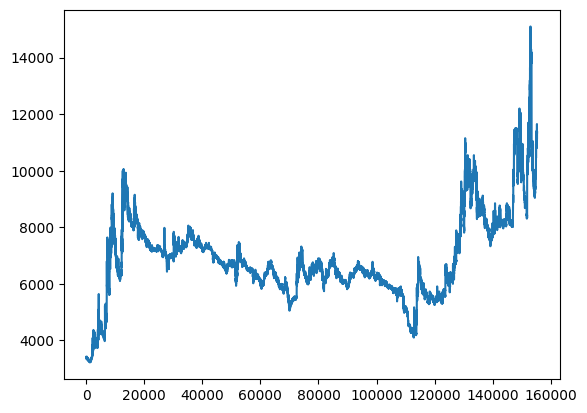

In [8]:
import matplotlib.pyplot as plt

plt.plot(res_df_.close.values)

# plt.plot(res_df_.iloc[:valid_idx[-1]].close)
# plt.plot(res_df_adj_.iloc[:valid_idx[-1]].close)

# plt.plot(res_df_adj_.close)

# legacy

## saving dict queue as pkl test

In [2]:
# t_list = [1]
# print(t_list.extend([1]))
# # t_list
t_queue = [{"code": code, "ep_loc_point2": 0, "streamer": None} for code in range(5)]

In [6]:
t_queue[0][["code", "streamer"]]

TypeError: unhashable type: 'list'

In [46]:
os.getcwd()

'D:\\Projects\\System_Trading\\JnQ_32bit'

In [15]:
import pickle

watch_data_queue = [{"code": code, "ep_loc_point2": 0, "streamer": None}]
watch_data_queue[0]["df"] = df_min_chart
with open('df_min_chart.pkl','wb') as fw:
    pickle.dump(watch_data_queue, fw)

In [16]:
with open('df_min_chart.pkl', 'rb') as fr:
    watch_data_queue = pickle.load(fr)

In [21]:
watch_data_queue[0]['df'].dtypes

open      float64
high      float64
low       float64
close     float64
volume    float64
dtype: object

## singleton

In [ ]:
import sys
from PyQt5.QtWidgets import QApplication, QWidget, QPushButton
from PyQt5.QtCore import QCoreApplication
import time


class MyApp(QWidget):

    def __init__(self):
        super().__init__()
        self.initUI()

    def initUI(self):
        btn = QPushButton('Quit', self)
        btn.move(50, 50)
        btn.resize(btn.sizeHint())
        # btn.clicked.connect(QCoreApplication.instance().quit)

        self.setWindowTitle('Quit Button')
        self.setGeometry(300, 300, 300, 200)
        self.show()

        print("start.")
        time.sleep(2)
        QCoreApplication.exit()
        print("exit.")


if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = MyApp()
    # sys.exit(app.exec_())

In [ ]:
import sys
import uuid

from PyQt5.QtWidgets import QApplication, QMainWindow, QPushButton


class MainWindow(QMainWindow):
    singleton: 'MainWindow' = None

    def __init__(self):
        super().__init__()
        btn = QPushButton(f'RESTART\n{uuid.uuid4()}')
        btn.clicked.connect(MainWindow.restart)
        self.setCentralWidget(btn)
        self.show()

    @staticmethod
    def restart():
        MainWindow.singleton = MainWindow()


def main():
    app = QApplication([])
    MainWindow.restart()
    sys.exit(app.exec_())


if __name__ == '__main__':
    # main()
    
    app = QApplication(sys.argv)
    MainWindow.restart()
    sys.exit(app.exec_())

In [3]:
app = QApplication(sys.argv)
BankModule(None) #.restart()
# sys.exit(app.exec_())

event_connect executed.
on_receive_tr_data 실행: screen_no: 0102, request_name: 서버구분, tr_code: KOA_NORMAL_BUY_KP_ORD, record_name: , inquiry: 
login_loop.exit() executed.
return_code : 0
connected.


In [4]:
BankModule(None).restart()

event_connect executed.
login_loop.exit() executed.
return_code : -106


eventConnect -101


event_connect executed.
login_loop.exit() executed.
return_code : -101
disconnected.


KiwoomConnectError: 로그인 여부를 확인하십시오

## loop_data as a dict

In [40]:
t_dict = {}
for v in range(5):
    t_dict[v] = v
t_dict

# dict(zip(L1,L2))

code = 1
code2 = 1
order_no = "123152"

keys = ["code", "order_no", "code2"]
values = [eval(key) for key in keys]
type(value[-1])


# a, b = dict(zip(keys,values)).values()
dict(zip(keys,values)).values()

dict_values([1, '123152', 1])

## reversed loop

In [57]:
# for 
for code in np.arange(3):
    t_dict[code] = 1
t_dict

{'a': 1, 'b': 2, 0: 1, 1: 1, 2: 1}

In [63]:
t_dict = {"a": 1, "b": 2}

print(len(t_dict))

watch_queue = {"a1": {"a": 1, "b": 2}, "b1": {"c": 1, "d": 2}}

# for w_i, code in zip(reversed(range(len(t_list))), reversed(t_list)):
#     print("w_i :", w_i)
#     print(code)
# list(reversed(t_list))

open_queue = {}
# pop_list = []

for w_i, (code, item) in enumerate(watch_queue.copy().items()):
# for w_i, (code, item) in enumerate(watch_queue.copy()):
    print("w_i :", w_i)
    
# for w_i, code in enumerate(reversed(watch_queue)):
    
    print("code :", code)
    print("item :", item)
    
    open_queue[code] = watch_queue[code]
    # pop_list.append(w_i)
    
    # open_queue.append(watch_queue.pop())    
    print("open_queue :", open_queue)
    
    # watch_queue.pop(w_i)
    watch_queue.pop(code)
    # watch_queue.popitem()
    # watch_queue2.remove(code2)
    # watch_queue.pop(w_i)
    print("watch_queue :", watch_queue)
    
# for w_i, code in zip(reversed(range(len(watch_queue))), reversed(watch_queue)):
#     print("w_i :", w_i)
    
# # for w_i, code in enumerate(reversed(watch_queue)):
    
#     print("code :", code)
    
#     open_queue.append(code)
#     # pop_list.append(w_i)
    
#     # open_queue.append(watch_queue.pop())    
#     print("open_queue :", open_queue)
    
#     # watch_queue.pop(w_i)
#     # watch_queue.pop(code)
#     watch_queue.popitem()
#     # watch_queue2.remove(code2)
#     # watch_queue.pop(w_i)
#     print("watch_queue :", watch_queue)
watch_queue

2
w_i : 0
code : a1
item : {'a': 1, 'b': 2}
open_queue : {'a1': {'a': 1, 'b': 2}}
watch_queue : {'b1': {'c': 1, 'd': 2}}
w_i : 1
code : b1
item : {'c': 1, 'd': 2}
open_queue : {'a1': {'a': 1, 'b': 2}, 'b1': {'c': 1, 'd': 2}}
watch_queue : {}


{}

In [9]:
top_code = df_high_fluc.iloc[:10] #.tolist()
top_code["ep_loc_point2"] = 0
top_code[["종목코드", "ep_loc_point2"]].to_numpy()[0]
watch_data_queue = top_code[["종목코드", "ep_loc_point2"]].values.tolist()
watch_data_queue

[['214680', 0],
 ['417010', 0],
 ['091580', 0],
 ['056080', 0],
 ['347770', 0],
 ['099190', 0],
 ['032685', 0],
 ['099750', 0],
 ['041020', 0],
 ['288980', 0]]

In [32]:
t_list = []
t_list.append("")
# t_list.append(_)
t_list[0]
t_list

['']

In [22]:
t_dict = {"a": 1, "c": 1}
t_dict2 = {"b": 2}
# t_dict.update({"a": 1})
t_dict.update(t_dict2)
t_dict

{'a': 1, 'c': 1, 'b': 2}

In [11]:
watch_queue = np.arange(10).astype(str).tolist()
watch_queue2 = np.arange(10, 20).astype(str).tolist()
# watch_queue = np.ones_like(watch_queue).tolist()
# watch_queue = ['1']
open_queue = []
pop_list = []

# for code, code2 in zip(reversed(watch_queue), reversed(watch_queue2)):
# for code in reversed(watch_queue):
# for code in watch_queue:

for w_i, code in zip(reversed(range(len(watch_queue))), reversed(watch_queue)):
    print("w_i :", w_i)
    
# for w_i, code in enumerate(reversed(watch_queue)):
    
    print("code :", code)
    
    open_queue.append(code)
    # pop_list.append(w_i)
    
    # open_queue.append(watch_queue.pop())    
    print("open_queue :", open_queue)
    
    # watch_queue.pop(w_i)
    # watch_queue.pop(code)
    watch_queue.remove(code)
    # watch_queue2.remove(code2)
    # watch_queue.pop(w_i)
    print("watch_queue :", watch_queue)
    # print("watch_queue2 :", watch_queue2)
# watch_queue
    
    # del watch_queue[w_i]

NameError: name 'np' is not defined

# olds